<a href="https://colab.research.google.com/github/sgevatschnaider/IA-Teoria-Practica/blob/main/notebooks/Validaci%C3%B3n_cruzada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Característica,k-fold Cross Validation,Shuffle-Split
Forma de dividir,Divide el dataset en k partes iguales (folds). Cada fold se usa 1 vez como validación.,Selecciona aleatoriamente un porcentaje fijo para train/test en cada split.
Determinismo,Determinista (siempre que uses la misma semilla y shuffle inicial).,"Probabilístico: cada split depende de la aleatoriedad, puede variar."
Cobertura de los datos,Todos los datos aparecen exactamente 1 vez en validación.,"No hay garantía: algunos datos pueden nunca estar en test, otros repetirse."
Número de evaluaciones,Fijo: exactamente k evaluaciones.,"Flexible: definís n_splits, puede ser cualquier cantidad."
Tamaño de test,Aproximadamente 1/k del dataset en cada fold.,"Definido explícitamente (test_size), independiente de n_splits."

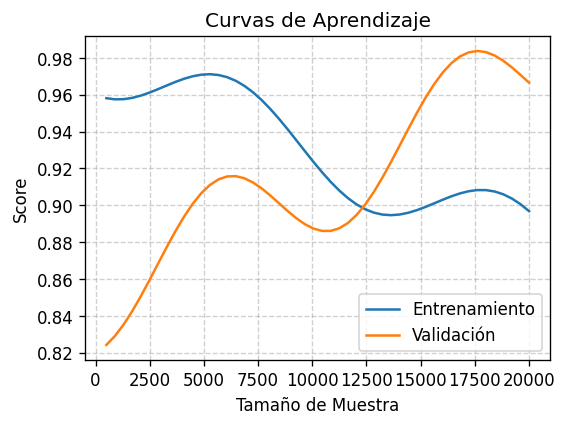
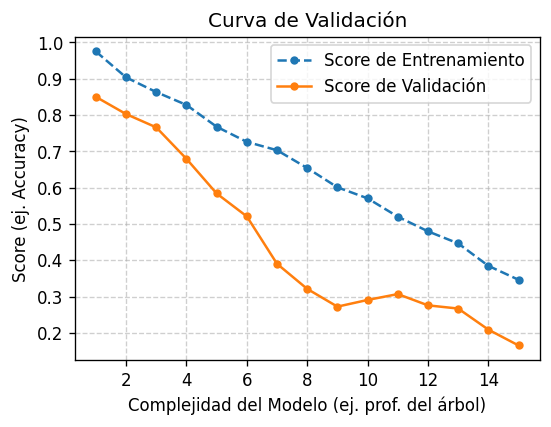

In [ ]:
# This cell builds an interactive HTML page (for Google Colab / Jupyter) that
# explains "Validación en Machine Learning" using the user's index. It includes:
# - Theme toggle (light/dark)
# - Animated bubble background
# - Collapsible sections + sticky index
# - MathJax for formulas
# - Two illustrative charts generated with matplotlib (Validation and Learning Curves)
# - Interactive sliders: K-folds visualizer and Train/Val/Test split visualizer
# - A comparison table for K-Fold vs Shuffle-Split
#
# The result is also saved as an .html file for download.

from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import io, base64, os

# -------------------- Utilities --------------------
def fig_to_base64(dpi=120):
    """Encode current Matplotlib figure to base64 PNG and close the figure."""
    buf = io.BytesIO()
    plt.savefig(buf, format="png", dpi=dpi, bbox_inches="tight")
    plt.close()
    buf.seek(0)
    return base64.b64encode(buf.read()).decode("ascii")

# -------------------- Figure 1: Validation Curve --------------------
np.random.seed(42)
param_range = np.arange(1, 16)
train_scores = 0.96 - 0.04 * param_range + 0.05 / param_range + np.random.normal(0, 0.01, len(param_range))
valid_scores = 0.92 - 0.2 * np.exp(-0.5 * (param_range - 8)**2 / 4) - 0.05 * param_range + np.random.normal(0, 0.015, len(param_range))
train_scores = np.clip(train_scores, 0, 1)
valid_scores = np.clip(valid_scores, 0.1, 0.85)


plt.figure(figsize=(5, 3.5))
plt.plot(param_range, train_scores, label="Score de Entrenamiento", marker='o', markersize=4, linestyle='--')
plt.plot(param_range, valid_scores, label="Score de Validación", marker='o', markersize=4)
plt.xlabel("Complejidad del Modelo (ej. prof. del árbol)")
plt.ylabel("Score (ej. Accuracy)")
plt.title("Curva de Validación")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
img_validation_curve = fig_to_base64()


# -------------------- Figure 2: Learning Curves (samples vs error) --------------------
np.random.seed(0)
n = np.linspace(500, 20000, 50)
train_lc = 0.98 - 0.000005*n - 0.02*np.cos(n/2000)
val_lc   = 0.85 + 0.000006*n - 0.03*np.cos(n/1800)
train_lc = np.clip(train_lc, 0, 1)
val_lc   = np.clip(val_lc, 0, 1)

plt.figure(figsize=(5, 3.5))
plt.plot(n, train_lc, label="Entrenamiento")
plt.plot(n, val_lc,   label="Validación")
plt.xlabel("Tamaño de Muestra")
plt.ylabel("Score")
plt.title("Curvas de Aprendizaje")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
img_learning_curves = fig_to_base64()


# -------------------- Content Blocks (Generated from user's index) --------------------
intro_html = r"""
<p>El objetivo principal en Machine Learning es construir modelos que <strong>generalicen</strong> bien, es decir, que hagan predicciones precisas sobre datos nuevos que no se utilizaron durante el entrenamiento. ¿Pero cómo podemos medir esta capacidad de generalización de manera fiable?</p>
<p>Simplemente evaluar el modelo con los mismos datos con los que fue entrenado es engañoso. Un modelo puede "memorizar" las respuestas del conjunto de entrenamiento y aun así ser inútil en un escenario real. Aquí es donde la <strong>validación</strong> se vuelve fundamental: es el proceso de evaluar el rendimiento del modelo en un conjunto de datos independiente para obtener una estimación imparcial de su desempeño en el mundo real.</p>
<p>Un escenario típico de entrenamiento y evaluación implica una estricta separación de datos. Primero, se entrena el modelo con un conjunto de datos (<em>Train</em>). Luego, se ajustan sus hiperparámetros usando un segundo conjunto (<em>Validación</em> o <em>Dev</em>). Finalmente, y solo una vez que el modelo está completamente definido, se mide su rendimiento final en un tercer conjunto (<em>Test</em>) que el modelo nunca ha "visto" antes.</p>
"""

traintest_html = r"""
<h4>Definición y Pasos Básicos</h4>
<p>El método más simple de validación es el <em>Train-Test Split</em> (Partición Entrenamiento-Prueba). Consiste en dividir el conjunto de datos disponible en dos subconjuntos.</p>
<ul>
  <li><strong>Conjunto de Entrenamiento (Train Set):</strong> Se utiliza para que el algoritmo de aprendizaje automático "aprenda" los patrones en los datos y ajuste los parámetros internos del modelo.</li>
  <li><strong>Conjunto de Prueba (Test Set):</strong> Se mantiene completamente separado durante el entrenamiento. Una vez que el modelo está entrenado, se utiliza para evaluar su rendimiento en datos "nuevos", proporcionando una estimación de cómo se comportará en producción.</li>
</ul>
<p>Este proceso ayuda a detectar el <strong>sobreajuste (overfitting)</strong>, que ocurre cuando un modelo aprende demasiado bien los datos de entrenamiento (incluido el ruido) y pierde su capacidad de generalizar.</p>
<div class="demo-card">
  <h4>Visualizador de Particiones Train/Val/Test</h4>
  <p>Ajusta los deslizantes; se normalizan automáticamente para sumar 100%. La separación en tres conjuntos (Train/Dev/Test) es una práctica robusta en proyectos grandes.</p>
  <div class="sliders">
    <label>Train <input id="rngTrain" type="range" min="10" max="90" value="70"></label>
    <label>Val <input id="rngVal" type="range" min="5" max="60" value="15"></label>
    <label>Test <input id="rngTest" type="range" min="5" max="60" value="15"></label>
  </div>
  <div class="stacked-bar" aria-label="Barra apilada de particiones">
    <div id="barTrain" class="seg train">Train 70%</div>
    <div id="barVal" class="seg val">Val 15%</div>
    <div id="barTest" class="seg test">Test 15%</div>
  </div>
</div>
"""

cv_motivation_html = r"""
<h4>Motivación y Objetivo</h4>
<p>Una simple partición Train-Test tiene una debilidad: el rendimiento medido puede depender en gran medida de <strong>cómo se realizó la partición al azar</strong>. Si por casualidad en el conjunto de prueba caen ejemplos muy "fáciles" o muy "difíciles", nuestra estimación del rendimiento será demasiado optimista o pesimista.</p>
<p>La <strong>Validación Cruzada (Cross-Validation)</strong> es una técnica que resuelve este problema al realizar múltiples particiones y promediar los resultados. Su objetivo es obtener una medida de rendimiento más robusta y estable, que sea independiente de una única partición aleatoria de los datos. Esto es especialmente útil cuando la cantidad de datos es limitada, ya que nos permite usar todos los datos tanto para entrenamiento como para validación.</p>
"""

kfold_html = r"""
<h4>K-Fold Cross Validation</h4>
<p>Es la técnica de validación cruzada más común. El procedimiento es el siguiente:</p>
<ol>
    <li>Se divide aleatoriamente el conjunto de datos en <strong>K</strong> subconjuntos o "folds" de tamaño aproximadamente igual.</li>
    <li>Se realizan <strong>K</strong> iteraciones. En cada iteración:
        <ul>
            <li>Un "fold" se reserva como conjunto de validación (test).</li>
            <li>Los <strong>K-1</strong> "folds" restantes se utilizan para entrenar el modelo.</li>
        </ul>
    </li>
    <li>Se calcula la métrica de rendimiento (ej. accuracy, MSE) para cada iteración.</li>
    <li>El resultado final es el <strong>promedio y la desviación estándar</strong> de las K métricas obtenidas. Esto nos da no solo una estimación del rendimiento, sino también una idea de su variabilidad.</li>
</ol>
<p>Este procedimiento nos permite comparar múltiples modelos de manera más justa: el modelo que obtenga el mejor rendimiento promedio en la validación cruzada será probablemente el que mejor generalice.</p>
<div class="demo-card">
  <h4>Visualizador de K-Folds</h4>
  <p>Elige \(K\) y observa cómo se alterna el fold de validación en cada iteración.</p>
  <label>Folds (K): <input id="rngK" type="range" min="3" max="10" value="5"></label>
  <div id="cvGrid" class="cv-grid" aria-label="Esquema K-fold"></div>
</div>
"""

randomcv_html = r"""
<h4>Validación Cruzada Aleatoria (Shuffle-Split)</h4>
<p>A diferencia de K-Fold, que divide los datos en particiones disjuntas, <strong>Shuffle-Split</strong> genera un número definido de particiones independientes. En cada iteración, los datos se barajan y se dividen en conjuntos de entrenamiento y prueba según un porcentaje especificado.</p>

<h4>Comparación: k-fold vs Shuffle-Split</h4>
<div class="table-container">
  <table class="comparison-table">
    <thead>
      <tr>
        <th>Característica</th>
        <th>k-fold Cross Validation</th>
        <th>Shuffle-Split</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td><strong>Forma de dividir</strong></td>
        <td>Divide el dataset en k partes iguales (folds). Cada fold se usa 1 vez como validación.</td>
        <td>Selecciona aleatoriamente un porcentaje fijo para train/test en cada split.</td>
      </tr>
      <tr>
        <td><strong>Determinismo</strong></td>
        <td>Determinista (siempre que uses la misma semilla y shuffle inicial).</td>
        <td>Probabilístico: cada split depende de la aleatoriedad, puede variar.</td>
      </tr>
      <tr>
        <td><strong>Cobertura de los datos</strong></td>
        <td>Todos los datos aparecen exactamente 1 vez en validación.</td>
        <td>No hay garantía: algunos datos pueden nunca estar en test, otros repetirse.</td>
      </tr>
      <tr>
        <td><strong>Número de evaluaciones</strong></td>
        <td>Fijo: exactamente k evaluaciones.</td>
        <td>Flexible: definís n_splits, puede ser cualquier cantidad.</td>
      </tr>
      <tr>
        <td><strong>Tamaño de test</strong></td>
        <td>Aproximadamente 1/k del dataset en cada fold.</td>
        <td>Definido explícitamente (test_size), independiente de n_splits.</td>
      </tr>
    </tbody>
  </table>
</div>


<h4>Rol de los Conjuntos Dev y Held-Out</h4>
<p>En un proceso riguroso, se usan tres conjuntos de datos:</p>
<ul>
    <li><strong>Train:</strong> Para entrenar los modelos. La validación cruzada (K-Fold o Shuffle-Split) se realiza <em>dentro</em> de este conjunto para ajustar hiperparámetros.</li>
    <li><strong>Desarrollo (Dev / Validation):</strong> Un conjunto intermedio usado para tomar decisiones, como qué familia de modelos usar o qué umbral de decisión elegir. El modelo "ve" este conjunto repetidamente durante el desarrollo.</li>
    <li><strong>Prueba (Test / Held-Out):</strong> Se mantiene "guardado bajo llave" y se utiliza <strong>una sola vez</strong> al final del proyecto para obtener una evaluación final e imparcial del modelo seleccionado.</li>
</ul>
<h4>Criterios Adicionales</h4>
<p>La <strong>Navaja de Ockham</strong> es un principio que sugiere que, ante dos modelos con un rendimiento similar, debemos preferir el más simple. Los modelos más simples tienden a generalizar mejor y son más fáciles de interpretar y mantener.</p>
"""

sklearn_html = r"""
<p>La biblioteca <strong>Scikit-Learn</strong> es el estándar de oro en Python para Machine Learning y ofrece un módulo muy completo llamado <code>model_selection</code> para todas estas tareas.</p>
<p>Funciones clave incluyen:</p>
<ul>
  <li><code>train_test_split</code>: Para realizar particiones simples de entrenamiento y prueba de manera rápida y eficiente. Permite estratificación para mantener la proporción de clases.</li>
  <li><code>KFold</code>, <code>StratifiedKFold</code>: Clases generadoras de índices para validación cruzada K-Fold, asegurando que cada muestra se use una vez para validación.</li>
  <li><code>ShuffleSplit</code>: Generador para validación cruzada aleatoria.</li>
  <li><code>cross_val_score</code>: Una función de alto nivel que realiza todo el proceso de validación cruzada (dividir, entrenar, evaluar) con una sola llamada.</li>
  <li><code>validation_curve</code>, <code>learning_curve</code>: Funciones para generar los datos necesarios para trazar las curvas de validación y aprendizaje.</li>
</ul>
<p>La documentación oficial de Scikit-Learn es un recurso excelente y muy detallado para profundizar en la implementación y opciones de cada una de estas herramientas.</p>
<div class="img-wrap">
  <img src="data:image/png;base64,{img_learning_curves}" alt="Curvas de aprendizaje" loading="lazy" decoding="async" width="520">
  <figcaption>Las curvas de aprendizaje, que relacionan el tamaño de la muestra con el rendimiento, ayudan a diagnosticar si un modelo se beneficiaría de más datos.</figcaption>
</div>
"""

curves_html = r"""
<p>Las <strong>curvas de validación</strong> son una herramienta de diagnóstico crucial para entender la relación entre un hiperparámetro del modelo y su rendimiento.</p>
<p>Se traza el rendimiento (score) del modelo en los conjuntos de entrenamiento y validación mientras se varía un hiperparámetro, como por ejemplo:</p>
<ul>
    <li>La profundidad máxima de un árbol de decisión.</li>
    <li>El valor de <code>C</code> (regularización) en una SVM.</li>
    <li>El número de vecinos en un modelo KNN.</li>
</ul>
<h4>Diagnóstico de Overfitting y Underfitting</h4>
<p>La forma de estas curvas nos dice mucho sobre el comportamiento del modelo:</p>
<ul>
    <li><strong>Underfitting (Subajuste):</strong> Ocurre cuando tanto el score de entrenamiento como el de validación son bajos. El modelo es demasiado simple para capturar los patrones en los datos.</li>
    <li><strong>Overfitting (Sobreajuste):</strong> Ocurre cuando el score de entrenamiento es muy alto, pero el de validación es significativamente más bajo. El modelo está "memorizando" el entrenamiento y no generaliza.</li>
    <li><strong>Buen Ajuste:</strong> Se busca un punto donde el score de validación es máximo y la diferencia (<em>gap</em>) con el score de entrenamiento es pequeña.</li>
</ul>
<p>Es fundamental interpretar estas curvas no solo en términos de valores, sino en el contexto del problema real para decidir cuál es el mejor compromiso entre sesgo y varianza.</p>
<div class="img-wrap">
  <img src="data:image/png;base64,{img_validation_curve}" alt="Curva de validación" loading="lazy" decoding="async" width="520">
  <figcaption>Una curva de validación típica. La zona óptima está donde el score de validación alcanza su máximo antes de que la brecha con el entrenamiento se vuelva demasiado grande.</figcaption>
</div>
"""

conclusions_html = r"""
<p>La validación es una piedra angular en el desarrollo de modelos de Machine Learning. Permite obtener una estimación fiable del rendimiento del modelo y tomar decisiones informadas.</p>
<ul>
    <li>Una simple partición <strong>Train/Test</strong> es un primer paso, pero susceptible a la aleatoriedad de la división.</li>
    <li>La <strong>Validación Cruzada (K-Fold)</strong> ofrece una evaluación mucho más robusta al promediar los resultados de múltiples particiones.</li>
    <li>La separación en conjuntos <strong>Train, Dev y Test</strong> es crucial para un desarrollo honesto, evitando el sobreajuste a los datos de prueba durante la selección y ajuste de hiperparámetros.</li>
    <li>Las <strong>curvas de validación y aprendizaje</strong> son herramientas de diagnóstico indispensables para identificar problemas de sobreajuste o subajuste y guiar el desarrollo del modelo.</li>
</ul>
<p>Aplicar estas técnicas correctamente, utilizando herramientas como Scikit-Learn, es esencial para construir modelos que no solo funcionen bien en el papel, sino que aporten valor en el mundo real.</p>
"""

# -------------------- HTML Template (FIXED) --------------------
# All literal curly braces '{' and '}' in CSS and JS are now doubled
# to prevent Python's .format() method from misinterpreting them.
html_page = """
<!DOCTYPE html>
<html lang="es" data-theme="dark">
<head>
  <meta charset="UTF-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0" />
  <title>Validación en Machine Learning — Guía Interactiva</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;700;900&display=swap" rel="stylesheet" />
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.5.0/css/all.min.css" rel="stylesheet" />
  <script>
    window.MathJax = {{
      tex: {{ inlineMath: [['$','$'], ['\\\\(','\\\\)']] }},
      svg: {{ fontCache: 'global' }}
    }};
  </script>
  <script async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-svg.js"></script>
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg,#0b1220 0%,#0f172a 100%);
      --bg-secondary: rgba(15,23,42,.92);
      --bg-tertiary: rgba(2,6,23,.88);
      --text-primary: #e2e8f0;
      --text-secondary: #cbd5e1;
      --accent: #38bdf8;
      --border: rgba(148,163,184,.28);
      --radius: 22px;
      --shadow: 0 16px 36px rgba(0,0,0,.40);
      --trans: all .35s cubic-bezier(.25,.8,.25,1);
      --bubble-core: rgba(56,189,248,.65);
      --bubble-glow: rgba(56,189,248,.35);
      --seg-train: #1e293b;
      --seg-val: #0f766e;
      --seg-test: #7c2d12;
    }}
    html[data-theme="light"] {{
      --bg-primary: linear-gradient(135deg,#e0f2fe 0%,#f0f9ff 100%);
      --bg-secondary: rgba(255,255,255,.94);
      --bg-tertiary: rgba(240,249,255,.98);
      --text-primary: #0f172a;
      --text-secondary: #334155;
      --accent: #0ea5e9;
      --border: rgba(2,132,199,.30);
      --shadow: 0 16px 36px rgba(2,6,23,.18);
      --bubble-core: rgba(255,255,255,.55);
      --bubble-glow: rgba(14,165,233,.25);
      --seg-train: #bae6fd;
      --seg-val: #a7f3d0;
      --seg-test: #fecaca;
    }}
    * {{ box-sizing: border-box; }}
    body {{
      margin: 0; background: var(--bg-primary); color: var(--text-primary);
      font-family: Inter, system-ui, -apple-system, Segoe UI, Roboto, sans-serif;
      font-size: 18px; line-height: 1.8; padding-bottom: 28px;
    }}
    #app {{ position: relative; min-height: 100vh; }}
    .particles {{ position:absolute; inset:0; z-index:0; pointer-events:none; overflow:hidden; }}
    .particle {{
      position:absolute; border-radius:50%;
      background: radial-gradient(circle at 30% 30%, var(--bubble-core), transparent 60%);
      box-shadow: 0 0 12px 2px var(--bubble-glow), 0 0 24px 6px rgba(255,255,255,.08);
      filter: blur(0.2px); animation: floaty 26s infinite linear; opacity: 0;
    }}
    @keyframes floaty {{
      0% {{ transform: translateY(110%) rotate(0deg); opacity: 0; }}
      10% {{ opacity: .75; }} 90% {{ opacity: .75; }}
      100% {{ transform: translateY(-15%) rotate(360deg); opacity: 0; }}
    }}
    .topbar {{
      position: sticky; top: 10px; z-index: 2; display:flex; align-items:center; justify-content:space-between;
      margin: 14px auto 0; padding: 12px 14px; max-width: 1120px;
      background: var(--bg-secondary); border: 1.6px solid var(--border);
      border-radius: var(--radius); box-shadow: var(--shadow); backdrop-filter: blur(12px); gap: 10px; flex-wrap:wrap;
    }}
    .brand {{ font-weight: 900; letter-spacing: .35px; font-size: 20px; display:flex; gap:8px; align-items:center; }}
    .actions {{ display:flex; align-items:center; gap: 10px; position:relative; flex-wrap:wrap; }}
    .menu-btn {{
      display:inline-flex; align-items:center; gap:.55rem; padding:.68rem 1.05rem; border-radius:999px;
      cursor:pointer; border:1px solid var(--border); background: var(--bg-tertiary);
      transition: var(--trans); font-weight:800; text-decoration:none; color: var(--text-primary);
    }}
    .menu-btn:hover {{ transform: translateY(-1px); }}
    .menu-list {{
      position:absolute; top:110%; left:0; min-width:260px; background: var(--bg-secondary);
      border:1.5px solid var(--border); border-radius:14px; box-shadow: var(--shadow);
      padding:.6rem; display:none; max-height:60vh; overflow:auto; z-index:10;
    }}
    .menu-link {{ display:block; padding:.65rem .8rem; border-radius:10px; text-decoration:none; color: var(--text-primary); font-size: 16px; }}
    .menu-link:hover {{ background: var(--bg-tertiary); }}
    .theme-toggle {{
      display:inline-flex; align-items:center; gap:.6rem; padding:.72rem 1.1rem; border-radius:999px;
      cursor:pointer; user-select:none; border:1.5px solid var(--border); background: var(--bg-tertiary);
      transition: var(--trans); font-weight: 900; color: var(--text-primary);
    }}
    .theme-toggle:hover {{ transform: translateY(-1px); }}

    .container {{ position:relative; z-index:1; max-width:1120px; margin: 14px auto 20px; padding: 0 14px; }}
    .page-title {{
      text-align:center; margin: 16px 0 20px; font-weight: 900; font-size: clamp(28px, 4vw, 42px);
      background: linear-gradient(135deg, var(--accent), #67e8f9); -webkit-background-clip: text; -webkit-text-fill-color: transparent;
      letter-spacing: .4px; padding: 0 20px;
    }}
    .topic-card {{
      background: var(--bg-secondary); border: 1.6px solid var(--border); border-radius: var(--radius);
      box-shadow: var(--shadow); overflow:hidden; margin: 16px 0;
    }}
    .topic-header {{ display:flex; justify-content:space-between; align-items:center; padding: 18px 22px; cursor:pointer; }}
    .topic-title {{ font-weight: 900; font-size: 20px; }}
    .expand-icon {{ transition: var(--trans); color: var(--text-secondary); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); color: var(--accent); }}
    .topic-content {{ max-height:0; overflow:hidden; transition: max-height 1s ease, padding .4s ease; background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 8000px; padding: 16px 22px; }}
    .topic-content p, .topic-content ul, .topic-content ol {{ color: var(--text-secondary); margin: .65rem 0; }}
    .topic-content ul, .topic-content ol {{ padding-left: 25px; }}
    .topic-content li {{ margin:.38rem 0; }}
    .topic-content code {{ background: rgba(148,163,184,.18); padding: .12rem .4rem; border-radius: 6px; }}
    .img-wrap {{ text-align:center; margin: 12px auto; }}
    figcaption {{ font-size: 14px; opacity:.85; }}

    .demo-card {{ background: var(--bg-secondary); border: 1px dashed var(--border); border-radius: 16px; padding: 12px 14px; margin: 12px 0; }}
    .sliders label {{ display:block; margin: 6px 0; }}
    input[type="range"] {{ width: 100%; }}

    .stacked-bar {{ display:flex; height: 32px; border-radius: 10px; overflow:hidden; border:1px solid var(--border); margin-top: 10px; }}
    .seg {{ display:flex; align-items:center; justify-content:center; font-weight:800; font-size: 12px; }}
    .seg.train {{ background: var(--seg-train); }}
    .seg.val   {{ background: var(--seg-val); }}
    .seg.test  {{ background: var(--seg-test); }}

    .cv-grid {{ display:grid; grid-auto-rows: 18px; gap: 6px; margin-top: 10px; }}
    .cv-row {{ display:grid; grid-template-columns: repeat(10, 1fr); gap: 3px; }}
    .cv-cell {{ height: 18px; border-radius: 4px; background: var(--bg-secondary); border:1px solid var(--border); }}
    .cv-cell.train {{ background: var(--seg-train); }}
    .cv-cell.val   {{ background: var(--seg-val); }}

    .table-container {{ overflow-x: auto; margin: 22px 0; }}
    .comparison-table {{
      width: 100%;
      border-collapse: collapse;
      font-size: 16px;
      text-align: left;
    }}
    .comparison-table th, .comparison-table td {{
      border: 1.5px solid var(--border);
      padding: 10px 14px;
      color: var(--text-secondary);
    }}
    .comparison-table th {{
      background-color: var(--seg-train);
      font-weight: 800;
      color: var(--text-primary);
    }}
    .comparison-table td strong {{ color: var(--text-primary); }}
    .comparison-table tr:nth-child(even) {{ background-color: rgba(148,163,184,.08); }}


    footer {{ text-align:center; color: var(--text-secondary); opacity:.92; margin: 22px 0 8px; font-weight:800; font-size: 14px; }}
  </style>
</head>
<body>
  <div id="app">
    <div class="particles" id="particles"></div>

    <div class="topbar">
      <div class="brand"><i class="fa-solid fa-chart-line"></i> Guía de Validación</div>
      <div class="actions">
        <div class="dropdown" style="position:relative;">
          <button id="menuBtn" class="menu-btn" aria-haspopup="true" aria-expanded="false">
            <i class="fa-solid fa-list"></i> 📑 Índice <i class="fa-solid fa-chevron-down"></i>
          </button>
          <div id="menuList" class="menu-list" role="menu">
            <a class="menu-link" href="#intro">1. Introducción</a>
            <a class="menu-link" href="#traintest">2. Train/Test Split</a>
            <a class="menu-link" href="#cv">3. Validación Cruzada</a>
            <a class="menu-link" href="#kfold">4. K-Fold Cross Validation</a>
            <a class="menu-link" href="#randomcv">5. CV Aleatoria y Roles de Datos</a>
            <a class="menu-link" href="#sklearn">6. Implementación en Scikit-Learn</a>
            <a class="menu-link" href="#curves">7. Curvas de Validación</a>
            <a class="menu-link" href="#conclusions">8. Conclusiones</a>
          </div>
        </div>
      </div>
      <button id="themeBtn" class="theme-toggle" title="Cambiar tema" aria-pressed="true">
        <i id="themeIcon" class="fa-solid fa-sun" aria-hidden="true"></i>
        <span id="themeLabel" class="theme-label">Tema: Oscuro</span>
      </button>
    </div>

    <main class="container">
      <h1 class="page-title">Validación en Machine Learning</h1>

      <section id="intro" class="topic-card open">
        <div class="topic-header" role="button"><span class="topic-title">1. ¿Cómo evaluar si el modelo está aprendiendo?</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{intro_html}</div>
      </section>

      <section id="traintest" class="topic-card open">
        <div class="topic-header" role="button"><span class="topic-title">2. Train/Test Split</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{traintest_html}</div>
      </section>

      <section id="cv" class="topic-card">
        <div class="topic-header" role="button"><span class="topic-title">3. Validación Cruzada (Motivación)</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{cv_motivation_html}</div>
      </section>

      <section id="kfold" class="topic-card">
        <div class="topic-header" role="button"><span class="topic-title">4. Técnica: K-Fold Cross Validation</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{kfold_html}</div>
      </section>

      <section id="randomcv" class="topic-card">
        <div class="topic-header" role="button"><span class="topic-title">5. CV Aleatoria y Roles de Datos</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{randomcv_html}</div>
      </section>

      <section id="sklearn" class="topic-card">
        <div class="topic-header" role="button"><span class="topic-title">6. Implementación en Scikit-Learn</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{sklearn_html}</div>
      </section>

      <section id="curves" class="topic-card">
        <div class="topic-header" role="button"><span class="topic-title">7. Diagnóstico con Curvas de Validación</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{curves_html}</div>
      </section>

      <section id="conclusions" class="topic-card">
        <div class="topic-header" role="button"><span class="topic-title">8. Conclusiones Principales</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{conclusions_html}</div>
      </section>

      <footer>Material elaborado por el profesor Sergio Gevatschnaider</footer>
    </main>

    <script>
      (function() {{
        const root = document.getElementById('app');
        const doc  = document.documentElement;

        // ----- Theme (persistente) -----
        const themeBtn   = root.querySelector('#themeBtn');
        const themeIcon  = root.querySelector('#themeIcon');
        const themeLabel = root.querySelector('#themeLabel');
        function setTheme(t) {{
          doc.setAttribute('data-theme', t);
          try {{ localStorage.setItem('mlval.theme', t); }} catch(e) {{}}
          const dark = (t === 'dark');
          themeIcon.className = dark ? 'fa-solid fa-sun' : 'fa-solid fa-moon';
          themeLabel.textContent = 'Tema: ' + (dark ? 'Oscuro' : 'Claro');
          themeBtn.setAttribute('aria-pressed', dark ? 'true' : 'false');
        }}
        const saved = (typeof localStorage !== 'undefined') ? localStorage.getItem('mlval.theme') : 'dark';
        setTheme(saved || 'dark');
        themeBtn.addEventListener('click', () => {{
          const next = (doc.getAttribute('data-theme') === 'dark') ? 'light' : 'dark';
          setTheme(next);
        }});

        // ----- Partículas -----
        const container = root.querySelector('#particles');
        if (container) {{
          for (let i = 0; i < 46; i++) {{
            const p = document.createElement('div');
            p.className = 'particle';
            const size = (Math.random() * 14 + 6);
            p.style.width = size + 'px';
            p.style.height = size + 'px';
            p.style.left = (Math.random() * 100) + '%';
            p.style.bottom = (-12 + Math.random() * 12) + '%';
            p.style.animationDelay = (Math.random() * -24) + 's';
            p.style.animationDuration = (20 + Math.random() * 16) + 's';
            container.appendChild(p);
          }}
        }}

        // ----- Menú desplegable -----
        const menuBtn  = root.querySelector('#menuBtn');
        const menuList = root.querySelector('#menuList');
        if (menuBtn && menuList) {{
            menuBtn.addEventListener('click', (e) => {{
              e.stopPropagation();
              const open = menuList.style.display === 'block';
              menuList.style.display = open ? 'none' : 'block';
              menuBtn.setAttribute('aria-expanded', (!open).toString());
            }});
            document.addEventListener('click', () => {{
              menuList.style.display = 'none';
              menuBtn.setAttribute('aria-expanded', 'false');
            }});
            menuList.querySelectorAll('a.menu-link').forEach(a => {{
              a.addEventListener('click', (e) => {{
                e.preventDefault(); e.stopPropagation();
                const target = document.querySelector(a.getAttribute('href'));
                if (target) {{
                  const y = target.getBoundingClientRect().top + window.scrollY - 80;
                  window.scrollTo({{ top: y, behavior: 'smooth' }});
                }}
                menuList.style.display = 'none';
                menuBtn.setAttribute('aria-expanded', 'false');
              }});
            }});
        }}

        // ----- Tarjetas colapsables -----
        root.querySelectorAll('.topic-header').forEach(h => {{
          h.addEventListener('click', () => {{
            h.parentElement.classList.toggle('open');
          }});
        }});

        // ----- Barra apilada Train/Val/Test -----
        const rngTrain = document.getElementById('rngTrain');
        const rngVal   = document.getElementById('rngVal');
        const rngTest  = document.getElementById('rngTest');
        const barTrain = document.getElementById('barTrain');
        const barVal   = document.getElementById('barVal');
        const barTest  = document.getElementById('barTest');

        function updateStacked() {{
          if (!rngTrain) return;
          let a = parseFloat(rngTrain.value);
          let b = parseFloat(rngVal.value);
          let c = parseFloat(rngTest.value);
          const sum = a + b + c;
          a = 100*a/sum; b = 100*b/sum; c = 100*c/sum;
          barTrain.style.width = a + '%'; barTrain.textContent = 'Train ' + a.toFixed(0) + '%';
          barVal.style.width   = b + '%'; barVal.textContent   = 'Val '   + b.toFixed(0) + '%';
          barTest.style.width  = c + '%'; barTest.textContent  = 'Test '  + c.toFixed(0) + '%';
        }}
        if (rngTrain) {{
            [rngTrain, rngVal, rngTest].forEach(el => el.addEventListener('input', updateStacked));
            updateStacked();
        }}

        // ----- Visualizador K-fold -----
        const rngK   = document.getElementById('rngK');
        const cvGrid = document.getElementById('cvGrid');

        function drawKfold() {{
          if(!rngK || !cvGrid) return;
          const K = parseInt(rngK.value, 10);
          cvGrid.innerHTML = '';
          cvGrid.style.gridTemplateRows = `repeat(${{K}}, 18px)`;
          for (let k=0; k<K; k++) {{
            const row = document.createElement('div');
            row.className = 'cv-row';
            row.style.gridTemplateColumns = `repeat(${{K}}, 1fr)`;
            for (let j=0; j<K; j++) {{
              const cell = document.createElement('div');
              cell.className = 'cv-cell ' + (j===k ? 'val' : 'train');
              row.appendChild(cell);
            }}
            cvGrid.appendChild(row);
          }}
        }}
        if (rngK) {{
          rngK.addEventListener('input', drawKfold);
          drawKfold();
        }}
      }})();
    </script>
  </div>
</body>
</html>
"""

# -------------------- Final Assembly Step --------------------

# 1. Inject images into the content blocks that need them
curves_html = curves_html.format(img_validation_curve=img_validation_curve)
sklearn_html = sklearn_html.format(img_learning_curves=img_learning_curves)

# 2. Inject all the final content blocks into the main page template
final_html_page = html_page.format(
    intro_html=intro_html,
    traintest_html=traintest_html,
    cv_motivation_html=cv_motivation_html,
    kfold_html=kfold_html,
    randomcv_html=randomcv_html,
    sklearn_html=sklearn_html,
    curves_html=curves_html,
    conclusions_html=conclusions_html
)

# 3. Display the result
display(HTML(final_html_page))


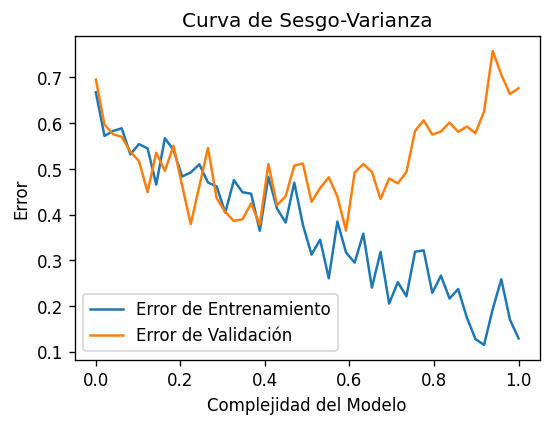
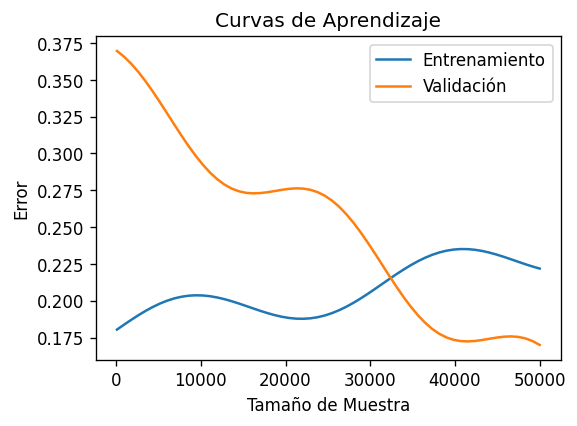

In [ ]:
# This cell builds an interactive HTML page (for Google Colab / Jupyter) that
# explains "Validación en Machine Learning" using the user's text. It includes:
# - Theme toggle (light/dark)
# - Animated bubble background
# - Collapsible sections + sticky index
# - MathJax for formulas
# - Two illustrative charts generated with matplotlib (no seaborn, no custom colors)
# - Interactive sliders: K-folds visualizer and Train/Val/Test split visualizer
#
# The result is also saved as an .html file for download.

from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import io, base64, os

# -------------------- Utilities --------------------
def fig_to_base64(dpi=120):
    """Encode current Matplotlib figure to base64 PNG and close the figure."""
    buf = io.BytesIO()
    plt.savefig(buf, format="png", dpi=dpi, bbox_inches="tight")
    plt.close()
    buf.seek(0)
    return base64.b64encode(buf.read()).decode("ascii")

# -------------------- Figure 1: Bias-Variance (Train vs Val error) --------------------
np.random.seed(7)
x = np.linspace(0, 1, 50)                 # model "complexity" normalized [0,1]
train = 0.6 - 0.45 * x + 0.04*np.random.randn(len(x))
val   = 0.6 - 0.75 * x + 0.85*(x**2) + 0.05*np.random.randn(len(x))
train = np.clip(train, 0.02, None)
val   = np.clip(val, 0.02, None)

plt.figure(figsize=(5, 3.5))
plt.plot(x, train, label="Error de Entrenamiento")
plt.plot(x, val,   label="Error de Validación")
plt.xlabel("Complejidad del Modelo")
plt.ylabel("Error")
plt.title("Curva de Sesgo-Varianza")
plt.legend()
img_bias_variance = fig_to_base64()

# -------------------- Figure 2: Learning Curves (samples vs error) --------------------
n = np.linspace(100, 50000, 60)
# Make train error slightly increase (harder as data grows) and val decrease with data
train_lc = 0.18 + 0.000001*n + 0.015*np.sin(n/5000)
val_lc   = 0.35 - 0.000004*n + 0.02*np.cos(n/4000)
train_lc = np.clip(train_lc, 0.02, None)
val_lc   = np.clip(val_lc, 0.02, None)

plt.figure(figsize=(5, 3.5))
plt.plot(n, train_lc, label="Entrenamiento")
plt.plot(n, val_lc,   label="Validación")
plt.xlabel("Tamaño de Muestra")
plt.ylabel("Error")
plt.title("Curvas de Aprendizaje")
plt.legend()
img_learning_curves = fig_to_base64()

# -------------------- Content Blocks (User-provided text) --------------------
intro_html = r"""
<p>Un modelo de <em>Machine Learning</em> recibe entradas \(X\) (p. ej., características de un cliente) y predice salidas \(Y\) (p. ej., si pagará a tiempo). Supondremos que los pares \((X,Y)\) provienen de una distribución fija \(P(X,Y)\), la “regla” que genera los datos reales.</p>
<p>Elegimos una familia de modelos \( \mathcal{H} \) (árboles, redes, etc.) y, dentro de ella, entrenamos un modelo \(f\) que transforma \(x \mapsto f(x)\). Para medir su desempeño definimos una pérdida \(\ell(y, f(x))\): cuanto más grande, peor.</p>
<ul>
  <li><strong>Riesgo esperado</strong> \(R(f) = \mathbb{E}_{(X,Y)\sim P}[\ell(Y,f(X))]\): error promedio en datos nuevos (lo que importa, pero no podemos calcular exacto).</li>
  <li><strong>Riesgo empírico</strong> \(\hat R(f) = \frac{1}{n}\sum_{i=1}^n \ell(y_i, f(x_i))\): error promedio sobre la muestra disponible.</li>
</ul>
<p>Decimos que el modelo <strong>aprende</strong> si al bajar \(\hat R(f)\) también baja \(R(f)\). La diferencia \(R(f) - \hat R(f)\) es la <em>brecha de generalización</em>. Si es grande, hay <em>overfitting</em>; si el modelo es demasiado simple y falla en train y test, hay <em>underfitting</em>.</p>
<div class="img-wrap">
  <img src="data:image/png;base64,REPLACE_BIAS_VAR" alt="Curva de sesgo-varianza (entrenamiento vs validación)" loading="lazy" decoding="async" width="520">
  <figcaption>Ilustración típica: el error de validación decrece hasta cierto punto y luego aumenta por sobreajuste.</figcaption>
</div>
"""

practica_html = r"""
<p>Separamos los datos por <strong>roles</strong> para evitar trampas:</p>
<ul>
  <li><strong>Train</strong>: ajusta los parámetros del modelo.</li>
  <li><strong>Validación (Dev)</strong>: elige hiperparámetros y toma decisiones durante el desarrollo.</li>
  <li><strong>Test (Held-out)</strong>: se usa una única vez al final para estimar rendimiento creíble.</li>
</ul>
<p>El <em>pipeline honesto</em> calcula todo (imputación, escalado, selección) <strong>solo con Train</strong> y aplica esos parámetros a Val/Test. Así evitamos <em>leakage</em>.</p>

<div class="grid-2">
  <div>
    <h4>Datos i.i.d. (intercambiables)</h4>
    <p>Usar muestreo aleatorio estratificado.</p>
    <h4>Series de tiempo</h4>
    <p>Respetar orden temporal (entrenar con pasado, evaluar con futuro). <code>TimeSeriesSplit</code> es apropiado.</p>
    <h4>Por grupos (múltiples filas por entidad)</h4>
    <p>Usar <code>GroupSplit</code>: cada entidad va enteramente a Train o Test.</p>
  </div>
  <div>
    <h4>Cambios de distribución</h4>
    <ul>
      <li><strong>Covariate shift</strong>: cambia \(P(X)\).</li>
      <li><strong>Prior shift</strong>: cambia \(P(Y)\).</li>
      <li><strong>Concept drift</strong>: cambia \(P(Y\mid X)\).</li>
    </ul>
    <p>Evaluar en ventanas futuras o dominios específicos para medir robustez.</p>
  </div>
</div>

<div class="demo-card">
  <h4>Visualizador de particiones Train/Val/Test</h4>
  <p>Ajusta los deslizantes; se normalizan automáticamente para sumar 100%.</p>
  <div class="sliders">
    <label>Train <input id="rngTrain" type="range" min="10" max="90" value="60"></label>
    <label>Val <input id="rngVal" type="range" min="5" max="60" value="20"></label>
    <label>Test <input id="rngTest" type="range" min="5" max="60" value="20"></label>
  </div>
  <div class="stacked-bar" aria-label="Barra apilada de particiones">
    <div id="barTrain" class="seg train">Train 60%</div>
    <div id="barVal" class="seg val">Val 20%</div>
    <div id="barTest" class="seg test">Test 20%</div>
  </div>
</div>
"""

metricas_html = r"""
<p>Elegimos métricas alineadas al objetivo.</p>
<div class="grid-2">
  <div>
    <h4>Regresión</h4>
    <ul>
      <li><strong>MSE</strong> / <strong>RMSE</strong>: penalizan más los errores grandes.</li>
      <li><strong>MAE</strong>: robusto a atípicos.</li>
      <li><strong>\(R^2\)</strong>: varianza explicada.</li>
    </ul>
  </div>
  <div>
    <h4>Clasificación</h4>
    <ul>
      <li><strong>Accuracy</strong>: puede engañar si hay clases raras.</li>
      <li><strong>Precision</strong> y <strong>Recall</strong>; <strong>F1</strong> balancea ambas.</li>
      <li><strong>ROC-AUC</strong>: ordena positivos sobre negativos; con desbalance, mejor <strong>PR-AUC</strong>.</li>
      <li><strong>Log-loss</strong>, <strong>Brier</strong>: calidad probabilística.</li>
      <li><strong>Calibración</strong>: que 0.7 signifique ~70% de aciertos.</li>
    </ul>
  </div>
</div>
<div class="img-wrap">
  <img src="data:image/png;base64,REPLACE_LC" alt="Curvas de aprendizaje (tamaño de muestra vs error)" loading="lazy" decoding="async" width="520">
  <figcaption>Curvas de aprendizaje: con más datos, típicamente baja el error de validación y la brecha Train–Val.</figcaption>
</div>
"""

evidencia_html = r"""
<p>La <strong>validación cruzada</strong> (K-fold) reduce varianza de la estimación y da estabilidad.</p>
<ul>
  <li>Partimos en \(K\) folds; entrenamos \(K\) veces dejando 1 fold para validar; promediamos.</li>
  <li>Para selección de hiperparámetros agresiva, usar <em>nested CV</em>: una capa interior (tuning) y otra exterior (estimación sin sesgo).</li>
</ul>

<div class="demo-card">
  <h4>Visualizador de K-folds</h4>
  <p>Elige \(K\) y mira cómo se alterna el fold de validación.</p>
  <label>Folds (K): <input id="rngK" type="range" min="3" max="10" value="5"></label>
  <div id="cvGrid" class="cv-grid" aria-label="Esquema K-fold"></div>
</div>
"""

escenario_html = r"""
<p><strong>Ejemplo:</strong> 100&nbsp;000 instancias i.i.d.; split estratificado 60/20/20. El pipeline se ajusta con Train, se eligen hiperparámetros con Validación (p. ej., la profundidad que maximiza PR-AUC promedio en K-fold dentro de Train), se fija el modelo y recién entonces se evalúa en Test.</p>
<p>Para series de tiempo: entrenar hasta 2023, validar en 2024, probar en 2025; jamás usar datos de 2025 para entrenar si evaluamos 2025. Con múltiples filas por paciente/cliente: dividir por entidad para no “ver” la misma entidad en ambos lados.</p>
<p>Reportar métrica principal <em>y</em> su incertidumbre (IC o bootstrap) para distinguir mejoras reales de ruido.</p>
"""

resumen_html = r"""
<p><strong>Aprender</strong> es bajar el error en datos nuevos, no solo en entrenamiento. Para medirlo con credibilidad: separa Train/Val/Test, evita <em>leakage</em>, usa métricas acordes y verifica estabilidad con validación cruzada. Si hay estructura (tiempo, grupos, desbalance, <em>shift</em>), adapta partición y métrica para reflejar el mundo real.</p>
"""

# -------------------- HTML Template --------------------
html_page = f"""
<!DOCTYPE html>
<html lang="es" data-theme="dark">
<head>
  <meta charset="UTF-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0" />
  <title>Validación en Machine Learning — Guía Interactiva</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;700;900&display=swap" rel="stylesheet" />
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.5.0/css/all.min.css" rel="stylesheet" />
  <script>
    window.MathJax = {{
      tex: {{ inlineMath: [['$','$'], ['\\\\(','\\\\)']] }},
      svg: {{ fontCache: 'global' }}
    }};
  </script>
  <script async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-svg.js"></script>
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg,#0b1220 0%,#0f172a 100%);
      --bg-secondary: rgba(15,23,42,.92);
      --bg-tertiary: rgba(2,6,23,.88);
      --text-primary: #e2e8f0;
      --text-secondary: #cbd5e1;
      --accent: #38bdf8;
      --border: rgba(148,163,184,.28);
      --radius: 22px;
      --shadow: 0 16px 36px rgba(0,0,0,.40);
      --trans: all .35s cubic-bezier(.25,.8,.25,1);
      --bubble-core: rgba(56,189,248,.65);
      --bubble-glow: rgba(56,189,248,.35);
      --seg-train: #1e293b;
      --seg-val: #0f766e;
      --seg-test: #7c2d12;
    }}
    html[data-theme="light"] {{
      --bg-primary: linear-gradient(135deg,#e0f2fe 0%,#f0f9ff 100%);
      --bg-secondary: rgba(255,255,255,.94);
      --bg-tertiary: rgba(240,249,255,.98);
      --text-primary: #0f172a;
      --text-secondary: #334155;
      --accent: #0ea5e9;
      --border: rgba(2,132,199,.30);
      --shadow: 0 16px 36px rgba(2,6,23,.18);
      --bubble-core: rgba(255,255,255,.55);
      --bubble-glow: rgba(14,165,233,.25);
      --seg-train: #bae6fd;
      --seg-val: #a7f3d0;
      --seg-test: #fecaca;
    }}
    * {{ box-sizing: border-box; }}
    body {{
      margin: 0; background: var(--bg-primary); color: var(--text-primary);
      font-family: Inter, system-ui, -apple-system, Segoe UI, Roboto, sans-serif;
      font-size: 18px; line-height: 1.8; padding-bottom: 28px;
    }}
    #app {{ position: relative; min-height: 100vh; }}
    .particles {{ position:absolute; inset:0; z-index:0; pointer-events:none; overflow:hidden; }}
    .particle {{
      position:absolute; border-radius:50%;
      background: radial-gradient(circle at 30% 30%, var(--bubble-core), transparent 60%);
      box-shadow: 0 0 12px 2px var(--bubble-glow), 0 0 24px 6px rgba(255,255,255,.08);
      filter: blur(0.2px); animation: floaty 26s infinite linear; opacity: 0;
    }}
    @keyframes floaty {{
      0% {{ transform: translateY(110%) rotate(0deg); opacity: 0; }}
      10% {{ opacity: .75; }} 90% {{ opacity: .75; }}
      100% {{ transform: translateY(-15%) rotate(360deg); opacity: 0; }}
    }}
    .topbar {{
      position: sticky; top: 10px; z-index: 2; display:flex; align-items:center; justify-content:space-between;
      margin: 14px auto 0; padding: 12px 14px; max-width: 1120px;
      background: var(--bg-secondary); border: 1.6px solid var(--border);
      border-radius: var(--radius); box-shadow: var(--shadow); backdrop-filter: blur(12px); gap: 10px;
    }}
    .brand {{ font-weight: 900; letter-spacing: .35px; font-size: 20px; display:flex; gap:8px; align-items:center; }}
    .actions {{ display:flex; align-items:center; gap: 10px; position:relative; flex-wrap:wrap; }}
    .menu-btn {{
      display:inline-flex; align-items:center; gap:.55rem; padding:.68rem 1.05rem; border-radius:999px;
      cursor:pointer; border:1px solid var(--border); background: var(--bg-tertiary);
      transition: var(--trans); font-weight:800; text-decoration:none; color: var(--text-primary);
    }}
    .menu-btn:hover {{ transform: translateY(-1px); }}
    .menu-list {{
      position:absolute; top:110%; left:0; min-width:260px; background: var(--bg-secondary);
      border:1.5px solid var(--border); border-radius:14px; box-shadow: var(--shadow);
      padding:.6rem; display:none; max-height:60vh; overflow:auto;
    }}
    .menu-link {{ display:block; padding:.65rem .8rem; border-radius:10px; text-decoration:none; color: var(--text-primary); font-size: 16px; }}
    .menu-link:hover {{ background: var(--bg-tertiary); }}
    .link-btn {{
      display:inline-flex; align-items:center; gap:.6rem; padding:.72rem 1.1rem; border-radius:999px;
      cursor:pointer; text-decoration:none; background: linear-gradient(135deg, var(--accent), #67e8f9);
      color: #0b1220; font-weight:900; border: 0; box-shadow: 0 8px 18px rgba(14,165,233,.35);
      transition: var(--trans);
    }}
    html[data-theme="dark"] .link-btn {{ color:#031525; }}
    .link-btn:hover {{ transform: translateY(-1px) scale(1.01); box-shadow: 0 10px 22px rgba(14,165,233,.45); }}
    .theme-toggle {{
      display:inline-flex; align-items:center; gap:.6rem; padding:.72rem 1.1rem; border-radius:999px;
      cursor:pointer; user-select:none; border:1.5px solid var(--border); background: var(--bg-tertiary);
      transition: var(--trans); font-weight: 900; color: var(--text-primary);
      box-shadow: inset 0 0 0 2px rgba(255,255,255,.04), 0 8px 20px rgba(0,0,0,.1);
    }}
    .theme-toggle:hover {{ transform: translateY(-1px); }}
    .theme-toggle .dot {{ width: 10px; height:10px; border-radius:50%; background: linear-gradient(135deg, var(--accent), #67e8f9); box-shadow: 0 0 8px rgba(14,165,233,.6); }}
    .theme-label {{ font-weight:900; letter-spacing:.2px; }}

    .container {{ position:relative; z-index:1; max-width:1120px; margin: 14px auto 20px; padding: 0 14px; }}
    .page-title {{
      text-align:center; margin: 16px 0 20px; font-weight: 900; font-size: clamp(28px, 4vw, 42px);
      background: linear-gradient(135deg, var(--accent), #67e8f9); -webkit-background-clip: text; -webkit-text-fill-color: transparent;
      letter-spacing: .4px; padding: 0 20px;
    }}
    .topic-card {{
      background: var(--bg-secondary); border: 1.6px solid var(--border); border-radius: var(--radius);
      box-shadow: var(--shadow); overflow:hidden; margin: 16px 0;
    }}
    .topic-header {{ display:flex; justify-content:space-between; align-items:center; padding: 18px 22px; cursor:pointer; }}
    .topic-title {{ font-weight: 900; font-size: 20px; }}
    .expand-icon {{ transition: var(--trans); color: var(--text-secondary); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); color: var(--accent); }}
    .topic-content {{ max-height:0; overflow:hidden; transition: max-height 1s ease, padding .4s ease; background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 8000px; padding: 16px 22px; }}
    .topic-content p, .topic-content ul {{ color: var(--text-secondary); margin: .65rem 0; }}
    .topic-content ul {{ padding-left: 25px; }}
    .topic-content li {{ margin:.38rem 0; }}
    .topic-content code {{ background: rgba(148,163,184,.18); padding: .12rem .4rem; border-radius: 6px; }}
    .grid-2 {{ display:grid; grid-template-columns: repeat(auto-fit, minmax(280px, 1fr)); gap: 18px; }}
    .img-wrap {{ text-align:center; margin: 12px auto; }}
    figcaption {{ font-size: 14px; opacity:.85; }}

    .demo-card {{ background: var(--bg-secondary); border: 1px dashed var(--border); border-radius: 16px; padding: 12px 14px; margin: 12px 0; }}
    .sliders label {{ display:block; margin: 6px 0; }}
    input[type="range"] {{ width: 100%; }}

    .stacked-bar {{ display:flex; height: 32px; border-radius: 10px; overflow:hidden; border:1px solid var(--border); margin-top: 10px; }}
    .seg {{ display:flex; align-items:center; justify-content:center; font-weight:800; font-size: 12px; }}
    .seg.train {{ background: var(--seg-train); }}
    .seg.val   {{ background: var(--seg-val); }}
    .seg.test  {{ background: var(--seg-test); }}

    .cv-grid {{ display:grid; grid-auto-rows: 18px; gap: 6px; margin-top: 10px; }}
    .cv-row {{ display:grid; grid-template-columns: repeat(10, 1fr); gap: 3px; }}
    .cv-cell {{ height: 18px; border-radius: 4px; background: var(--bg-secondary); border:1px solid var(--border); }}
    .cv-cell.train {{ background: var(--seg-train); }}
    .cv-cell.val   {{ background: var(--seg-val); }}

    footer {{ text-align:center; color: var(--text-secondary); opacity:.92; margin: 22px 0 8px; font-weight:800; font-size: 14px; }}
  </style>
</head>
<body>
  <div id="app">
    <div class="particles" id="particles"></div>

    <div class="topbar">
      <div class="brand"><i class="fa-solid fa-robot"></i> Validación en ML</div>
      <div class="actions">
        <div class="dropdown" style="position:relative;">
          <button id="menuBtn" class="menu-btn" aria-haspopup="true" aria-expanded="false">
            <i class="fa-solid fa-list"></i> Índice <i class="fa-solid fa-chevron-down"></i>
          </button>
          <div id="menuList" class="menu-list" role="menu">
            <a class="menu-link" href="#intro">1) ¿Qué significa aprender?</a>
            <a class="menu-link" href="#practica">2) Evaluación sin trampas</a>
            <a class="menu-link" href="#metricas">3) Métricas</a>
            <a class="menu-link" href="#evidencia">4) Evidencia y estabilidad</a>
            <a class="menu-link" href="#escenario">5) Escenario completo</a>
            <a class="menu-link" href="#resumen">6) Resumen</a>
          </div>
        </div>
        <a class="link-btn" href="https://scikit-learn.org/stable/modules/cross_validation.html" target="_blank" rel="noopener noreferrer">
          <i class="fa-solid fa-book-open"></i> Guía scikit-learn
          <i class="fa-solid fa-arrow-up-right-from-square" aria-hidden="true"></i>
        </a>
      </div>
      <button id="themeBtn" class="theme-toggle" title="Cambiar tema" aria-pressed="true">
        <span class="dot" aria-hidden="true"></span>
        <i id="themeIcon" class="fa-solid fa-sun" aria-hidden="true"></i>
        <span id="themeLabel" class="theme-label">Tema: Oscuro</span>
      </button>
    </div>

    <main class="container">
      <h1 class="page-title">Introducción a la Validación en Machine Learning</h1>

      <section id="intro" class="topic-card open">
        <div class="topic-header" role="button"><span class="topic-title">1) Qué significa “aprender” en ML</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{intro_html}</div>
      </section>

      <section id="practica" class="topic-card open">
        <div class="topic-header" role="button"><span class="topic-title">2) Cómo evaluarlo en la práctica (sin trampas)</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{practica_html}</div>
      </section>

      <section id="metricas" class="topic-card">
        <div class="topic-header" role="button"><span class="topic-title">3) Métricas: qué mide cada una</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{metricas_html}</div>
      </section>

      <section id="evidencia" class="topic-card">
        <div class="topic-header" role="button"><span class="topic-title">4) Evidencia de aprendizaje y estabilidad</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{evidencia_html}</div>
      </section>

      <section id="escenario" class="topic-card">
        <div class="topic-header" role="button"><span class="topic-title">5) Escenario completo con datos nuevos</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{escenario_html}</div>
      </section>

      <section id="resumen" class="topic-card">
        <div class="topic-header" role="button"><span class="topic-title">6) Resumen corto</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{resumen_html}</div>
      </section>

      <footer>Material elaborado por el profesor Sergio Gevatschnaider</footer>
    </main>

    <script>
      (function() {{
        const root = document.getElementById('app');
        const doc  = document.documentElement;

        // ----- Theme (persistente) -----
        const themeBtn   = root.querySelector('#themeBtn');
        const themeIcon  = root.querySelector('#themeIcon');
        const themeLabel = root.querySelector('#themeLabel');
        function setTheme(t) {{
          doc.setAttribute('data-theme', t);
          try {{ localStorage.setItem('mlval.theme', t); }} catch(e) {{}}
          const dark = (t === 'dark');
          themeIcon.className = dark ? 'fa-solid fa-sun' : 'fa-solid fa-moon';
          themeLabel.textContent = 'Tema: ' + (dark ? 'Oscuro' : 'Claro');
          themeBtn.setAttribute('aria-pressed', dark ? 'true' : 'false');
        }}
        const saved = (typeof localStorage !== 'undefined') ? localStorage.getItem('mlval.theme') : 'dark';
        setTheme(saved || 'dark');
        themeBtn.addEventListener('click', () => {{
          const next = (doc.getAttribute('data-theme') === 'dark') ? 'light' : 'dark';
          setTheme(next);
        }});

        // ----- Partículas -----
        const container = root.querySelector('#particles');
        for (let i = 0; i < 46; i++) {{
          const p = document.createElement('div');
          p.className = 'particle';
          const size = (Math.random() * 14 + 6);
          p.style.width = size + 'px';
          p.style.height = size + 'px';
          p.style.left = (Math.random() * 100) + '%';
          p.style.bottom = (-12 + Math.random() * 12) + '%';
          p.style.animationDelay = (Math.random() * -24) + 's';
          p.style.animationDuration = (20 + Math.random() * 16) + 's';
          container.appendChild(p);
        }}

        // ----- Menú desplegable -----
        const menuBtn  = root.querySelector('#menuBtn');
        const menuList = root.querySelector('#menuList');
        menuBtn.addEventListener('click', (e) => {{
          e.stopPropagation();
          const open = menuList.style.display === 'block';
          menuList.style.display = open ? 'none' : 'block';
          menuBtn.setAttribute('aria-expanded', (!open).toString());
        }});
        document.addEventListener('click', () => {{
          menuList.style.display = 'none';
          menuBtn.setAttribute('aria-expanded', 'false');
        }});
        menuList.querySelectorAll('a.menu-link').forEach(a => {{
          a.addEventListener('click', (e) => {{
            e.preventDefault(); e.stopPropagation();
            const target = document.querySelector(a.getAttribute('href'));
            if (target) {{
              const y = target.getBoundingClientRect().top + window.scrollY - 80;
              window.scrollTo({{ top: y, behavior: 'smooth' }});
            }}
            menuList.style.display = 'none';
            menuBtn.setAttribute('aria-expanded', 'false');
          }});
        }});

        // ----- Tarjetas colapsables -----
        root.querySelectorAll('.topic-header').forEach(h => {{
          h.addEventListener('click', () => {{
            h.parentElement.classList.toggle('open');
          }});
        }});

        // ----- Barra apilada Train/Val/Test -----
        const rngTrain = document.getElementById('rngTrain');
        const rngVal   = document.getElementById('rngVal');
        const rngTest  = document.getElementById('rngTest');
        const barTrain = document.getElementById('barTrain');
        const barVal   = document.getElementById('barVal');
        const barTest  = document.getElementById('barTest');

        function updateStacked() {{
          let a = parseFloat(rngTrain.value);
          let b = parseFloat(rngVal.value);
          let c = parseFloat(rngTest.value);
          const sum = a + b + c;
          // Normalize to 100
          a = 100*a/sum; b = 100*b/sum; c = 100*c/sum;
          barTrain.style.width = a + '%'; barTrain.textContent = 'Train ' + a.toFixed(0) + '%';
          barVal.style.width   = b + '%'; barVal.textContent   = 'Val '   + b.toFixed(0) + '%';
          barTest.style.width  = c + '%'; barTest.textContent  = 'Test '  + c.toFixed(0) + '%';
        }}
        [rngTrain, rngVal, rngTest].forEach(el => el.addEventListener('input', updateStacked));
        updateStacked();

        // ----- Visualizador K-fold -----
        const rngK   = document.getElementById('rngK');
        const cvGrid = document.getElementById('cvGrid');

        function drawKfold() {{
          const K = parseInt(rngK.value, 10);
          cvGrid.innerHTML = '';
          cvGrid.style.gridTemplateRows = `repeat(${{K}}, 18px)`;
          for (let k=0; k<K; k++) {{
            const row = document.createElement('div');
            row.className = 'cv-row';
            row.style.gridTemplateColumns = `repeat(${{K}}, 1fr)`;
            for (let j=0; j<K; j++) {{
              const cell = document.createElement('div');
              cell.className = 'cv-cell ' + (j===k ? 'val' : 'train');
              row.appendChild(cell);
            }}
            cvGrid.appendChild(row);
          }}
        }}
        rngK.addEventListener('input', drawKfold);
        drawKfold();
      }})();
    </script>
  </div>
</body>
</html>
"""

# Inject images
html_page = html_page.replace("REPLACE_BIAS_VAR", img_bias_variance)
html_page = html_page.replace("REPLACE_LC", img_learning_curves)

display(HTML(html_page))




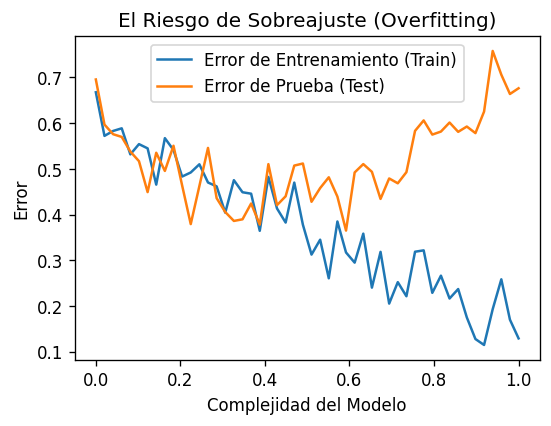

In [ ]:
# This cell builds an interactive HTML page (for Google Colab / Jupyter) that
# explains "Train/Test Split" using the user's text. It includes:
# - Theme toggle (light/dark)
# - Animated bubble background
# - Collapsible sections + sticky index
# - MathJax for formulas
# - An illustrative chart generated with matplotlib
# - Interactive sliders: Train/Val/Test split visualizer
# - Footer credit and a new practical example as requested.

from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import io, base64, os

# -------------------- Utilities --------------------
def fig_to_base64(dpi=120):
    """Encode current Matplotlib figure to base64 PNG and close the figure."""
    buf = io.BytesIO()
    plt.savefig(buf, format="png", dpi=dpi, bbox_inches="tight")
    plt.close()
    buf.seek(0)
    return base64.b64encode(buf.read()).decode("ascii")

# -------------------- Figure: Bias-Variance (Train vs Test error) --------------------
# This figure visually supports the concept of generalization and overfitting.
np.random.seed(7)
x = np.linspace(0, 1, 50)                 # model "complexity" normalized [0,1]
train = 0.6 - 0.45 * x + 0.04*np.random.randn(len(x))
test   = 0.6 - 0.75 * x + 0.85*(x**2) + 0.05*np.random.randn(len(x))
train = np.clip(train, 0.02, None)
test   = np.clip(test, 0.02, None)

plt.figure(figsize=(5, 3.5))
plt.plot(x, train, label="Error de Entrenamiento (Train)")
plt.plot(x, test,   label="Error de Prueba (Test)")
plt.xlabel("Complejidad del Modelo")
plt.ylabel("Error")
plt.title("El Riesgo de Sobreajuste (Overfitting)")
plt.legend()
img_bias_variance = fig_to_base64()


# -------------------- Content Blocks (User-provided text, adapted) --------------------
# Each block corresponds to a collapsible card in the final HTML.
# Math formulas are wrapped for MathJax rendering.

intro_html = fr"""
<p>Tienes un dataset finito \(S = \{{ (x_i, y_i) \}}_{{i=1}}^n\), muestreado de una distribución (regla aleatoria subyacente) \(P(X,Y)\) que genera pares entrada–salida. Un Train/Test Split es una partición de \(S\) en dos subconjuntos disjuntos: \(S_{{train}}\) para ajustar el modelo y \(S_{{test}}\) para evaluarlo.</p>
<p>El modelo resultante se denota \(f_{{train}}\), y su rendimiento en test es su <strong>riesgo empírico en test</strong>:
$$ \hat{{R}}_{{test}}(f_{{train}}) = \frac{{1}}{{|S_{{test}}|}} \sum_{{(x,y) \in S_{{test}}}} \ell(y, f_{{train}}(x)) $$
donde \(\ell\) es la función de pérdida (una regla que penaliza errores). Esta estimación aproxima el <strong>riesgo esperado</strong> \(R(f) = \mathbb{{E}}_{{(X,Y)\sim P}}[\ell(Y,f(X))]\), que es el error promedio sobre datos realmente no vistos.</p>
<p>La <strong>generalización</strong> es la capacidad de un modelo de mantener bajo el riesgo esperado cuando solo fue entrenado con una muestra. Un split bien hecho crea las condiciones para medir esa generalización sin contaminar el proceso.</p>
<h4>¿Por qué funciona (y cuándo se sesga)?</h4>
<p>Si \(S_{{train}}\) y \(S_{{test}}\) son muestras i.i.d. (independientes e idénticamente distribuidas) de \(P(X,Y)\) y todas las decisiones del pipeline se tomaron usando únicamente \(S_{{train}}\), entonces \(\hat{{R}}_{{test}}\) es un estimador casi insesgado de \(R(f)\).</p>
<p>El sesgo aparece con la <strong>fuga de información (leakage)</strong>: cualquier uso de datos de test durante el entrenamiento. Esto crea un optimismo artificial: el resultado en test parece bueno pero no se sostiene en producción.</p>
<div class="img-wrap">
  <img src="data:image/png;base64,{img_bias_variance}" alt="Curva de sesgo-varianza" loading="lazy" decoding="async" width="520">
  <figcaption>El error de test (línea naranja) mide la generalización. Si es mucho mayor que el de train, hay sobreajuste.</figcaption>
</div>
"""

partition_html = r"""
<h4>Estratificación en datos sin estructura</h4>
<p>Se hace una partición aleatoria preservando la proporción de clases (estratificación). Esto reduce la varianza de las métricas en clasificación. En regresión, se puede estratificar por cuantiles de la variable objetivo.</p>
<h4>Partición por grupos (GroupSplit)</h4>
<p>Si hay múltiples filas por una misma entidad (ej., transacciones de un cliente), la suposición i.i.d. se rompe. Se debe particionar por grupos: todas las filas de una entidad van juntas a train o a test.</p>
<h4>Series de Tiempo (TimeSeriesSplit)</h4>
<p>El orden es crucial. Un split correcto respeta la flecha del tiempo: entrenas con el pasado y evalúas con el futuro.</p>
<div class="demo-card">
  <h4>Visualizador de Particiones Train/Val/Test</h4>
  <p>Ajusta los deslizantes para ver cómo se distribuyen los datos. Aunque aquí se muestra un conjunto de validación (usado para ajustar hiperparámetros), el principio de la partición es el mismo.</p>
  <div class="sliders">
    <label>Train <input id="rngTrain" type="range" min="10" max="90" value="70"></label>
    <label>Val <input id="rngVal" type="range" min="5" max="40" value="15"></label>
    <label>Test <input id="rngTest" type="range" min="5" max="40" value="15"></label>
  </div>
  <div class="stacked-bar" aria-label="Barra apilada de particiones">
    <div id="barTrain" class="seg train">Train 70%</div>
    <div id="barVal" class="seg val">Val 15%</div>
    <div id="barTest" class="seg test">Test 15%</div>
  </div>
</div>
"""

# MODIFICACIÓN: Nuevo ejemplo en la siguiente variable `size_html`
size_html = fr"""
<p>El tamaño de \(S_{{test}}\) determina la precisión de tu medición. Para accuracy en clasificación, el error estándar se puede aproximar como \(\sqrt{{p(1-p)/n_{{test}}}}\), donde \(p\) es la accuracy y \(n_{{test}}\) el tamaño del conjunto de test.</p>
<p><strong>Ejemplo con clases raras (fraude):</strong> Imagina que la tasa de fraude es del 0.5%. Si tu conjunto de test tiene 20,000 muestras, esperas tener solo \(20,000 \times 0.005 = 100\) casos de fraude. Si tu modelo detecta 85 de ellos (Recall = 85%), el resultado parece bueno. Sin embargo, un cambio de solo 5 detecciones (detectar 80 o 90) movería el Recall entre 80% y 90%. Esto muestra que con pocos positivos en el test, la estimación de la métrica es muy volátil y su intervalo de confianza será amplio.</p>
<p>Con test muy pequeños o clases muy raras, la variabilidad de la métrica hará que aparentes mejoras sean solo ruido.</p>
"""

pipeline_html = r"""
<p>Imagina que estás en un laboratorio diseñando un fármaco:</p>
<ol>
  <li><strong>Fase Preclínica (Entrenamiento):</strong> Ajustas dosis y fórmulas con pruebas internas. Usas validación cruzada sobre el conjunto de entrenamiento para elegir los mejores hiperparámetros.</li>
  <li><strong>Ensayo Clínico (Test):</strong> El test es el ensayo doble ciego en pacientes nuevos. Se realiza una sola vez.</li>
</ol>
<p>Si cambias la dosis "mirando" los resultados del ensayo clínico mientras ocurre, has roto el protocolo y el resultado ya no es creíble. El Train/Test Split impone esa disciplina.</p>
<h4>El Proceso Paso a Paso:</h4>
<ul>
    <li><strong>1. Fijar métrica:</strong> Elige PR-AUC, RMSE, etc., según el problema.</li>
    <li><strong>2. Hacer el split:</strong> Separa el conjunto de test y "guárdalo en un sobre sellado".</li>
    <li><strong>3. Construir pipeline:</strong> Encapsula preprocesamiento y modelo. Todo se ajusta <em>solo</em> con train.</li>
    <li><strong>4. Ajustar hiperparámetros:</strong> Usa validación cruzada (o un split de validación) <em>dentro</em> de train.</li>
    <li><strong>5. Reentrenar:</strong> Con los mejores hiperparámetros, reentrena el pipeline en <em>todo</em> el conjunto de train.</li>
    <li><strong>6. Abrir el sobre:</strong> Evalúa una única vez en test y reporta el resultado con su incertidumbre (ej. intervalo de confianza).</li>
</ul>
"""

errors_html = r"""
<div class="grid-2">
    <div>
        <h4>Errores Frecuentes</h4>
        <ul>
            <li><strong>Sobreajuste al test:</strong> Usar el test repetidamente para afinar hiperparámetros. El resultado final es artificialmente bueno.</li>
            <li><strong>Fuga de datos (Leakage):</strong> Calcular estadísticas de preprocesamiento (medias, escalas) usando todo el dataset.</li>
            <li><strong>Ignorar estructura:</strong> No usar <code>GroupSplit</code> o <code>TimeSeriesSplit</code> cuando es necesario, rompiendo la hipótesis i.i.d.</li>
        </ul>
        <p><strong>La defensa:</strong> Separar roles, encapsular el pipeline y tratar el test como un auditor externo de una sola visita.</p>
    </div>
    <div>
        <h4>Resumen de Términos</h4>
        <ul>
            <li><strong>i.i.d.:</strong> Observaciones independientes e idénticamente distribuidas.</li>
            <li><strong>Leakage:</strong> Fuga de información de la evaluación al entrenamiento.</li>
            <li><strong>Estratificación:</strong> Particionar preservando proporciones.</li>
            <li><strong>Hiperparámetros:</strong> Configuraciones del modelo que se eligen con validación.</li>
            <li><strong>Intervalo de Confianza:</strong> Rango que cuantifica la incertidumbre de una métrica.</li>
        </ul>
    </div>
</div>
"""

summary_html = r"""
<p>Un Train/Test Split no es simplemente "separar 80/20". Es un <strong>protocolo riguroso</strong> que garantiza independencia, estabilidad y honestidad en la evaluación de un modelo.</p>
<p>Define la métrica adecuada, diseña la partición acorde a la estructura de tus datos, encapsula el pipeline para evitar fugas y reserva el conjunto de test como tu auditor final e imparcial. Así, el número que reportes reflejará el rendimiento que realmente puedes esperar cuando el modelo se enfrente al mundo real.</p>
"""


# -------------------- HTML Template (adapted for the new content) --------------------
html_page = f"""
<!DOCTYPE html>
<html lang="es" data-theme="dark">
<head>
  <meta charset="UTF-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0" />
  <title>Guía Interactiva sobre Train/Test Split</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;700;900&display=swap" rel="stylesheet" />
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.5.0/css/all.min.css" rel="stylesheet" />
  <script>
    window.MathJax = {{
      tex: {{ inlineMath: [['$','$'], ['\\\\(','\\\\)']], displayMath: [['$$','$$'], ['\\\\[','\\\\]']] }},
      svg: {{ fontCache: 'global' }}
    }};
  </script>
  <script async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-svg.js"></script>
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg,#0b1220 0%,#0f172a 100%); --bg-secondary: rgba(15,23,42,.92);
      --bg-tertiary: rgba(2,6,23,.88); --text-primary: #e2e8f0; --text-secondary: #cbd5e1;
      --accent: #38bdf8; --border: rgba(148,163,184,.28); --radius: 22px; --shadow: 0 16px 36px rgba(0,0,0,.40);
      --trans: all .35s cubic-bezier(.25,.8,.25,1); --bubble-core: rgba(56,189,248,.65); --bubble-glow: rgba(56,189,248,.35);
      --seg-train: #1e293b; --seg-val: #0f766e; --seg-test: #7c2d12;
    }}
    html[data-theme="light"] {{
      --bg-primary: linear-gradient(135deg,#e0f2fe 0%,#f0f9ff 100%); --bg-secondary: rgba(255,255,255,.94);
      --bg-tertiary: rgba(240,249,255,.98); --text-primary: #0f172a; --text-secondary: #334155;
      --accent: #0ea5e9; --border: rgba(2,132,199,.30); --shadow: 0 16px 36px rgba(2,6,23,.18);
      --bubble-core: rgba(255,255,255,.55); --bubble-glow: rgba(14,165,233,.25);
      --seg-train: #bae6fd; --seg-val: #a7f3d0; --seg-test: #fecaca;
    }}
    * {{ box-sizing: border-box; }}
    body {{
      margin: 0; background: var(--bg-primary); color: var(--text-primary);
      font-family: Inter, system-ui, -apple-system, Segoe UI, Roboto, sans-serif;
      font-size: 18px; line-height: 1.8; padding-bottom: 28px;
    }}
    #app {{ position: relative; min-height: 100vh; }}
    .particles {{ position:absolute; inset:0; z-index:0; pointer-events:none; overflow:hidden; }}
    .particle {{
      position:absolute; border-radius:50%; background: radial-gradient(circle at 30% 30%, var(--bubble-core), transparent 60%);
      box-shadow: 0 0 12px 2px var(--bubble-glow), 0 0 24px 6px rgba(255,255,255,.08);
      filter: blur(0.2px); animation: floaty 26s infinite linear; opacity: 0;
    }}
    @keyframes floaty {{
      0% {{ transform: translateY(110%) rotate(0deg); opacity: 0; }}
      10% {{ opacity: .75; }} 90% {{ opacity: .75; }}
      100% {{ transform: translateY(-15%) rotate(360deg); opacity: 0; }}
    }}
    .topbar {{
      position: sticky; top: 10px; z-index: 2; display:flex; align-items:center; justify-content:space-between;
      margin: 14px auto 0; padding: 12px 14px; max-width: 1120px;
      background: var(--bg-secondary); border: 1.6px solid var(--border);
      border-radius: var(--radius); box-shadow: var(--shadow); backdrop-filter: blur(12px); gap: 10px; flex-wrap: wrap;
    }}
    .brand {{ font-weight: 900; letter-spacing: .35px; font-size: 20px; display:flex; gap:8px; align-items:center; }}
    .actions {{ display:flex; align-items:center; gap: 10px; position:relative; flex-wrap:wrap; }}
    .menu-btn {{
      display:inline-flex; align-items:center; gap:.55rem; padding:.68rem 1.05rem; border-radius:999px;
      cursor:pointer; border:1px solid var(--border); background: var(--bg-tertiary);
      transition: var(--trans); font-weight:800; text-decoration:none; color: var(--text-primary);
    }}
    .menu-btn:hover {{ transform: translateY(-1px); }}
    .menu-list {{
      position:absolute; top:110%; left:0; min-width:260px; background: var(--bg-secondary);
      border:1.5px solid var(--border); border-radius:14px; box-shadow: var(--shadow);
      padding:.6rem; display:none; max-height:60vh; overflow:auto; z-index:10;
    }}
    .menu-link {{ display:block; padding:.65rem .8rem; border-radius:10px; text-decoration:none; color: var(--text-primary); font-size: 16px; }}
    .menu-link:hover {{ background: var(--bg-tertiary); }}
    .theme-toggle {{
      display:inline-flex; align-items:center; gap:.6rem; padding:.72rem 1.1rem; border-radius:999px;
      cursor:pointer; user-select:none; border:1.5px solid var(--border); background: var(--bg-tertiary);
      transition: var(--trans); font-weight: 900; color: var(--text-primary);
      box-shadow: inset 0 0 0 2px rgba(255,255,255,.04), 0 8px 20px rgba(0,0,0,.1);
    }}
    .theme-toggle:hover {{ transform: translateY(-1px); }}
    .container {{ position:relative; z-index:1; max-width:1120px; margin: 14px auto 20px; padding: 0 14px; }}
    .page-title {{
      text-align:center; margin: 16px 0 20px; font-weight: 900; font-size: clamp(28px, 4vw, 42px);
      background: linear-gradient(135deg, var(--accent), #67e8f9); -webkit-background-clip: text; -webkit-text-fill-color: transparent;
      letter-spacing: .4px; padding: 0 20px;
    }}
    .topic-card {{
      background: var(--bg-secondary); border: 1.6px solid var(--border); border-radius: var(--radius);
      box-shadow: var(--shadow); overflow:hidden; margin: 16px 0;
    }}
    .topic-header {{ display:flex; justify-content:space-between; align-items:center; padding: 18px 22px; cursor:pointer; }}
    .topic-title {{ font-weight: 900; font-size: 20px; }}
    .expand-icon {{ transition: var(--trans); color: var(--text-secondary); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); color: var(--accent); }}
    .topic-content {{ max-height:0; overflow:hidden; transition: max-height 1s ease, padding .4s ease; background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 8000px; padding: 16px 22px; }}
    .topic-content p, .topic-content ul, .topic-content ol {{ color: var(--text-secondary); margin: .65rem 0; }}
    .topic-content ul, .topic-content ol {{ padding-left: 25px; }}
    .topic-content li {{ margin:.38rem 0; }}
    .topic-content code {{ background: rgba(148,163,184,.18); padding: .12rem .4rem; border-radius: 6px; }}
    .grid-2 {{ display:grid; grid-template-columns: repeat(auto-fit, minmax(280px, 1fr)); gap: 18px; }}
    .img-wrap {{ text-align:center; margin: 12px auto; }}
    figcaption {{ font-size: 14px; opacity:.85; }}
    .demo-card {{ background: var(--bg-tertiary); border: 1px dashed var(--border); border-radius: 16px; padding: 12px 14px; margin: 12px 0; }}
    .sliders label {{ display:block; margin: 6px 0; }}
    input[type="range"] {{ width: 100%; }}
    .stacked-bar {{ display:flex; height: 32px; border-radius: 10px; overflow:hidden; border:1px solid var(--border); margin-top: 10px; }}
    .seg {{ display:flex; align-items:center; justify-content:center; font-weight:800; font-size: 12px; }}
    .seg.train {{ background: var(--seg-train); color: var(--text-primary); }}
    .seg.val   {{ background: var(--seg-val); color: #022c22; }}
    .seg.test  {{ background: var(--seg-test); color: #fef2f2; }}
    footer {{ text-align:center; color: var(--text-secondary); opacity:.92; margin: 22px 0 8px; font-weight:800; font-size: 14px; }}
  </style>
</head>
<body>
  <div id="app">
    <div class="particles" id="particles"></div>
    <div class="topbar">
      <div class="brand"><i class="fa-solid fa-code-branch"></i> Train/Test Split</div>
      <div class="actions">
        <div class="dropdown" style="position:relative;">
          <button id="menuBtn" class="menu-btn" aria-haspopup="true" aria-expanded="false">
            <i class="fa-solid fa-list"></i> Índice <i class="fa-solid fa-chevron-down"></i>
          </button>
          <div id="menuList" class="menu-list" role="menu">
            <a class="menu-link" href="#intro">1) ¿Qué es y por qué funciona?</a>
            <a class="menu-link" href="#partition">2) Cómo elegir la partición</a>
            <a class="menu-link" href="#size">3) Tamaño del test y precisión</a>
            <a class="menu-link" href="#pipeline">4) El Pipeline Honesto y Analogías</a>
            <a class="menu-link" href="#errors">5) Errores Frecuentes y Definiciones</a>
            <a class="menu-link" href="#summary">6) Cierre Operativo</a>
          </div>
        </div>
      </div>
      <button id="themeBtn" class="theme-toggle" title="Cambiar tema" aria-pressed="true">
        <i id="themeIcon" class="fa-solid fa-sun" aria-hidden="true"></i>
      </button>
    </div>

    <main class="container">
      <h1 class="page-title">Guía Interactiva sobre Train/Test Split</h1>

      <section id="intro" class="topic-card open">
        <div class="topic-header" role="button"><span class="topic-title">1) ¿Qué es y por qué funciona?</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{intro_html}</div>
      </section>

      <section id="partition" class="topic-card open">
        <div class="topic-header" role="button"><span class="topic-title">2) Cómo elegir la partición</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{partition_html}</div>
      </section>

      <section id="size" class="topic-card">
        <div class="topic-header" role="button"><span class="topic-title">3) Tamaño del test y precisión</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{size_html}</div>
      </section>

      <section id="pipeline" class="topic-card">
        <div class="topic-header" role="button"><span class="topic-title">4) El Pipeline Honesto y Analogías</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{pipeline_html}</div>
      </section>

      <section id="errors" class="topic-card">
        <div class="topic-header" role="button"><span class="topic-title">5) Errores Frecuentes y Definiciones</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{errors_html}</div>
      </section>

      <section id="summary" class="topic-card">
        <div class="topic-header" role="button"><span class="topic-title">6) Cierre Operativo</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{summary_html}</div>
      </section>

      <!-- MODIFICACIÓN: Nuevo pie de página -->
      <footer>Material elaborado por el profesor Sergio Gevatschnaider</footer>
    </main>

    <script>
      (function() {{
        const root = document.getElementById('app');
        const doc  = document.documentElement;

        const themeBtn   = root.querySelector('#themeBtn');
        const themeIcon  = root.querySelector('#themeIcon');
        function setTheme(t) {{
          doc.setAttribute('data-theme', t);
          try {{ localStorage.setItem('mlval.theme', t); }} catch(e) {{}}
          themeIcon.className = (t === 'dark') ? 'fa-solid fa-sun' : 'fa-solid fa-moon';
          themeBtn.setAttribute('aria-pressed', (t === 'dark').toString());
        }}
        const saved = (typeof localStorage !== 'undefined') ? localStorage.getItem('mlval.theme') : 'dark';
        setTheme(saved || 'dark');
        themeBtn.addEventListener('click', () => {{
          setTheme((doc.getAttribute('data-theme') === 'dark') ? 'light' : 'dark');
        }});

        const container = root.querySelector('#particles');
        for (let i = 0; i < 46; i++) {{
          const p = document.createElement('div');
          p.className = 'particle';
          const size = (Math.random() * 14 + 6);
          p.style.width = size + 'px'; p.style.height = size + 'px';
          p.style.left = (Math.random() * 100) + '%';
          p.style.bottom = (-12 + Math.random() * 12) + '%';
          p.style.animationDelay = (Math.random() * -24) + 's';
          p.style.animationDuration = (20 + Math.random() * 16) + 's';
          container.appendChild(p);
        }}

        const menuBtn  = root.querySelector('#menuBtn');
        const menuList = root.querySelector('#menuList');
        menuBtn.addEventListener('click', (e) => {{
          e.stopPropagation();
          const open = menuList.style.display === 'block';
          menuList.style.display = open ? 'none' : 'block';
          menuBtn.setAttribute('aria-expanded', (!open).toString());
        }});
        document.addEventListener('click', () => {{
          menuList.style.display = 'none';
          menuBtn.setAttribute('aria-expanded', 'false');
        }});
        menuList.querySelectorAll('a.menu-link').forEach(a => {{
          a.addEventListener('click', (e) => {{
            e.preventDefault(); e.stopPropagation();
            const target = document.querySelector(a.getAttribute('href'));
            if (target) {{
              const y = target.getBoundingClientRect().top + window.scrollY - 80;
              window.scrollTo({{ top: y, behavior: 'smooth' }});
            }}
            menuList.style.display = 'none';
            menuBtn.setAttribute('aria-expanded', 'false');
          }});
        }});

        root.querySelectorAll('.topic-header').forEach(h => {{
          h.addEventListener('click', () => h.parentElement.classList.toggle('open'));
        }});

        const rngTrain = document.getElementById('rngTrain'), rngVal = document.getElementById('rngVal'), rngTest = document.getElementById('rngTest');
        const barTrain = document.getElementById('barTrain'), barVal = document.getElementById('barVal'), barTest = document.getElementById('barTest');
        function updateStacked() {{
          let a = parseFloat(rngTrain.value), b = parseFloat(rngVal.value), c = parseFloat(rngTest.value);
          const sum = a + b + c;
          a = 100*a/sum; b = 100*b/sum; c = 100*c/sum;
          barTrain.style.width = a + '%'; barTrain.textContent = 'Train ' + a.toFixed(0) + '%';
          barVal.style.width   = b + '%'; barVal.textContent   = 'Val '   + b.toFixed(0) + '%';
          barTest.style.width  = c + '%'; barTest.textContent  = 'Test '  + c.toFixed(0) + '%';
        }}
        [rngTrain, rngVal, rngTest].forEach(el => el.addEventListener('input', updateStacked));
        updateStacked();
      }})();
    </script>
  </div>
</body>
</html>
"""

# Display the final interactive HTML page in the output cell
display(HTML(html_page))


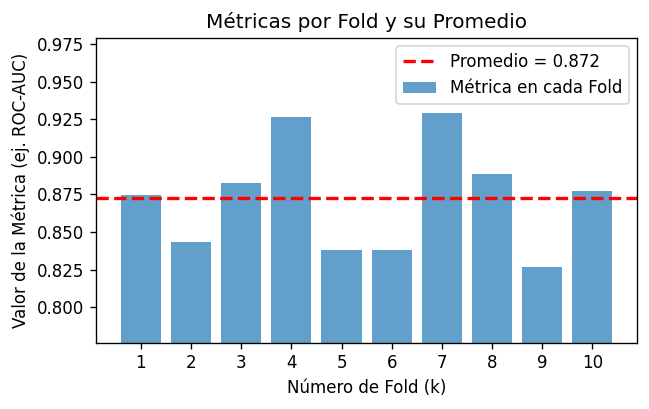

In [ ]:
# This cell builds an interactive HTML page (for Google Colab / Jupyter) that
# explains "Cross-Validation" using the user's text. It includes:
# - Theme toggle (light/dark)
# - Animated bubble background
# - Collapsible sections + sticky index
# - MathJax for formulas
# - A new illustrative chart for CV scores generated with matplotlib
# - An interactive K-folds visualizer
# - A practical Python code example with syntax highlighting.

from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import io, base64, os

# -------------------- Utilities --------------------
def fig_to_base64(dpi=120):
    """Encode current Matplotlib figure to base64 PNG and close the figure."""
    buf = io.BytesIO()
    plt.savefig(buf, format="png", dpi=dpi, bbox_inches="tight")
    plt.close()
    buf.seek(0)
    return base64.b64encode(buf.read()).decode("ascii")

# -------------------- Figure: CV Scores per Fold --------------------
# This figure visually shows the result of a K-fold CV run.
np.random.seed(42)
k_folds = 10
scores = 0.85 + 0.05 * np.random.randn(k_folds)
mean_score = np.mean(scores)

plt.figure(figsize=(5.5, 3.5))
bars = plt.bar(range(1, k_folds + 1), scores, alpha=0.7, label="Métrica en cada Fold")
plt.axhline(mean_score, color='r', linestyle='--', linewidth=2, label=f'Promedio = {mean_score:.3f}')
plt.xlabel("Número de Fold (k)")
plt.ylabel("Valor de la Métrica (ej. ROC-AUC)")
plt.title("Métricas por Fold y su Promedio")
plt.xticks(range(1, k_folds + 1))
plt.ylim(min(scores) - 0.05, max(scores) + 0.05)
plt.legend()
plt.tight_layout()
img_cv_scores = fig_to_base64()


# -------------------- Content Blocks (User-provided text, adapted) --------------------
# Each block corresponds to a collapsible card in the final HTML.
# Math formulas are wrapped for MathJax rendering.

intro_html = fr"""
<p>La idea central es estimar cómo rendirá un modelo sobre datos que no vio. Una sola partición Train/Test puede dar una visión engañosa por puro azar. La validación cruzada (CV) repite el proceso de entrenamiento-evaluación en <strong>múltiples particiones</strong> para que la estimación sea más estable y creíble.</p>
<p>El objetivo es aproximar mejor el <strong>riesgo esperado</strong> \(R(f) = \mathbb{{E}}[\ell(Y, f(X))]\) (error en datos nuevos) reduciendo la varianza de la estimación, es decir, la variabilidad causada por una división afortunada o desafortunada de los datos.</p>
<div class="img-wrap">
  <img src="data:image/png;base64,{img_cv_scores}" alt="Gráfico de métricas por fold" loading="lazy" decoding="async" width="520">
  <figcaption>En lugar de confiar en una sola métrica, la CV calcula varias y las promedia para obtener una estimación más robusta.</figcaption>
</div>
"""

kfold_html = fr"""
<p>Se divide el conjunto de desarrollo en \(K\) partes de tamaño similar (<em>folds</em>). En cada una de las \(K\) iteraciones, se reserva un fold para validación y se entrena el modelo con los \(K-1\) folds restantes. Esto produce \(K\) métricas \(m_1, m_2, \dots, m_K\).</p>
<ul>
    <li><strong>Estimación de rendimiento:</strong> El promedio \(\bar{{m}} = \frac{{1}}{{K}}\sum_{{k=1}}^K m_k\).</li>
    <li><strong>Estimación de estabilidad:</strong> La desviación estándar \(s\) de las métricas. Una dispersión alta indica que el rendimiento del modelo es muy sensible a la partición de los datos.</li>
</ul>
<p><strong>Detalles cruciales:</strong> La <strong>estratificación</strong> (mantener proporción de clases en cada fold) es vital en problemas de clasificación desbalanceada. Además, todo el <strong>preprocesamiento</strong> (escalado, imputación, etc.) debe ajustarse <em>dentro</em> de cada fold usando solo los datos de entrenamiento de esa iteración para evitar fuga de información.</p>

<div class="demo-card">
  <h4>Visualizador Interactivo de K-folds</h4>
  <p>Elige el número de folds (\(K\)) y observa cómo rota el conjunto de validación (en verde azulado) en cada iteración, mientras el resto de los datos se usa para entrenar (en azul oscuro).</p>
  <label>Folds (K): <input id="rngK" type="range" min="3" max="10" value="5"></label>
  <div id="cvGrid" class="cv-grid" aria-label="Esquema K-fold"></div>
</div>

<h4>Ejemplo de Código con Scikit-Learn</h4>
<p>Así se implementa una validación cruzada estratificada de 5 folds para un clasificador RandomForest.</p>
<pre><code>
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# 1. Crear datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=20,
                           n_informative=10, n_redundant=5,
                           flip_y=0.05, random_state=42)

# 2. Definir el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 3. Definir la estrategia de CV
# shuffle=True asegura particiones aleatorias
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Ejecutar la validación cruzada
# scoring='roc_auc' especifica la métrica
scores = cross_val_score(model, X, y, cv=cv_strategy, scoring='roc_auc')

# 5. Reportar resultados
print(f"Scores por fold: {scores}")
print(f"ROC-AUC Promedio: {scores.mean():.4f}")
print(f"Desviación Estándar: {scores.std():.4f}")
</code></pre>
"""

selection_html = r"""
<h4>Comparación de Modelos</h4>
<p>Para comparar dos modelos A y B, es crucial usar la <strong>misma partición de folds</strong> para ambos. Esto permite calcular la diferencia pareada fold a fold, \(d_k = m_k(A) - m_k(B)\), eliminando la variabilidad común del fold y logrando una comparación más precisa.</p>
<h4>Selección de Hiperparámetros</h4>
<p>Cuando se prueban muchas combinaciones de hiperparámetros, se corre el riesgo de sobreajustar la propia validación cruzada. Para evitarlo, se usa la <strong>Validación Cruzada Anidada (Nested CV)</strong>:</p>
<ul>
    <li><strong>Bucle Externo:</strong> Divide los datos para la estimación final del rendimiento (como una K-fold normal).</li>
    <li><strong>Bucle Interno:</strong> Dentro de cada fold de entrenamiento del bucle externo, se ejecuta otra K-fold completa para encontrar los <em>mejores hiperparámetros</em> solo para esa partición.</li>
</ul>
<p>Este protocolo proporciona una estimación insesgada del rendimiento que se puede esperar del <em>proceso de selección de hiperparámetros</em> en sí.</p>
"""

cases_html = r"""
<div class="grid-2">
    <div>
        <h4>CV Aleatoria (Repeated Random Sub-Sampling)</h4>
        <p>Consiste en repetir muchas veces un split aleatorio simple (ej. 80/20). A diferencia de K-fold, los conjuntos de validación pueden solaparse y no se garantiza que cada dato se use para validar. Es útil cuando el dataset es muy grande.</p>

        <h4>Rol del Conjunto Held-Out (Test)</h4>
        <p>En un proyecto real, siempre se debe reservar un conjunto de Test desde el inicio. Toda la experimentación (incluida la CV para seleccionar el modelo y sus hiperparámetros) se realiza sobre el resto de los datos (conjunto de Desarrollo o "Dev"). El Test se usa <strong>una única vez</strong> al final para auditar el modelo final.</p>
    </div>
    <div>
        <h4>Casos Especiales</h4>
        <ul>
            <li><strong>Datos Agrupados (<code>GroupKFold</code>):</strong> Si hay múltiples filas por entidad (cliente, paciente), se asegura que todas las filas de una entidad queden juntas en el mismo fold (sea de train o de val), evitando fugas.</li>
            <li><strong>Series de Tiempo (<code>TimeSeriesSplit</code>):</strong> Los folds respetan el orden temporal. Se entrena con el pasado y se valida con el futuro inmediato, en ventanas que se van expandiendo.</li>
            <li><strong>Clases Raras (<code>StratifiedKFold</code>):</strong> Garantiza que la proporción de clases se mantenga en cada fold, crucial para métricas como PR-AUC.</li>
        </ul>
    </div>
</div>
"""

summary_html = r"""
<h4>¿Cómo reportar resultados con rigor?</h4>
<p>Indica la métrica promedio, su dispersión (desviación estándar) y, si es posible, un intervalo de confianza. Especifica siempre el protocolo: tipo de CV (K-fold, anidada, etc.), valor de K, si fue estratificada o por grupos. Finalmente, confirma el resultado con el conjunto Held-Out.</p>
<h4>Resumen Operativo</h4>
<p>La validación cruzada es el estándar para obtener estimaciones robustas del rendimiento de un modelo y para seleccionar hiperparámetros de forma fiable. Adapta la estrategia de partición a la estructura de tus datos (grupos, tiempo, desbalance), encapsula el preprocesamiento dentro de cada fold y reserva un conjunto de test para la auditoría final. Esto minimiza el optimismo por azar y maximiza la credibilidad de tus resultados.</p>
"""


# -------------------- HTML Template (adapted for the new content) --------------------
html_page = f"""
<!DOCTYPE html>
<html lang="es" data-theme="dark">
<head>
  <meta charset="UTF-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0" />
  <title>Guía Interactiva sobre Validación Cruzada</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;700;900&display=swap" rel="stylesheet" />
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.5.0/css/all.min.css" rel="stylesheet" />
  <script>
    window.MathJax = {{
      tex: {{ inlineMath: [['$','$'], ['\\\\(','\\\\)']], displayMath: [['$$','$$'], ['\\\\[','\\\\]']] }},
      svg: {{ fontCache: 'global' }}
    }};
  </script>
  <script async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-svg.js"></script>
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg,#1e1b4b 0%,#1e293b 100%); --bg-secondary: rgba(30,41,59,.92);
      --bg-tertiary: rgba(15,23,42,.88); --text-primary: #e2e8f0; --text-secondary: #cbd5e1;
      --accent: #818cf8; --border: rgba(129,140,248,.28); --radius: 22px; --shadow: 0 16px 36px rgba(0,0,0,.40);
      --trans: all .35s cubic-bezier(.25,.8,.25,1); --bubble-core: rgba(129,140,248,.65); --bubble-glow: rgba(129,140,248,.35);
      --seg-train: #3730a3; --seg-val: #047857; --seg-test: #9f1239;
    }}
    html[data-theme="light"] {{
      --bg-primary: linear-gradient(135deg,#f5f3ff 0%,#faf5ff 100%); --bg-secondary: rgba(255,255,255,.94);
      --bg-tertiary: rgba(245,243,255,.98); --text-primary: #1e1b4b; --text-secondary: #374151;
      --accent: #6366f1; --border: rgba(99,102,241,.30); --shadow: 0 16px 36px rgba(30,27,75,.18);
      --bubble-core: rgba(255,255,255,.55); --bubble-glow: rgba(99,102,241,.25);
      --seg-train: #c7d2fe; --seg-val: #a7f3d0; --seg-test: #fecaca;
    }}
    * {{ box-sizing: border-box; }}
    body {{ margin: 0; background: var(--bg-primary); color: var(--text-primary); font-family: Inter, system-ui, sans-serif; font-size: 18px; line-height: 1.8; padding-bottom: 28px; }}
    #app {{ position: relative; min-height: 100vh; }}
    .particles {{ position:absolute; inset:0; z-index:0; pointer-events:none; overflow:hidden; }}
    .particle {{ position:absolute; border-radius:50%; background: radial-gradient(circle at 30% 30%, var(--bubble-core), transparent 60%); box-shadow: 0 0 12px 2px var(--bubble-glow), 0 0 24px 6px rgba(255,255,255,.08); filter: blur(0.2px); animation: floaty 26s infinite linear; opacity: 0; }}
    @keyframes floaty {{ 0% {{ transform: translateY(110%) rotate(0deg); opacity: 0; }} 10% {{ opacity: .75; }} 90% {{ opacity: .75; }} 100% {{ transform: translateY(-15%) rotate(360deg); opacity: 0; }} }}
    .topbar {{ position: sticky; top: 10px; z-index: 2; display:flex; align-items:center; justify-content:space-between; margin: 14px auto 0; padding: 12px 14px; max-width: 1120px; background: var(--bg-secondary); border: 1.6px solid var(--border); border-radius: var(--radius); box-shadow: var(--shadow); backdrop-filter: blur(12px); gap: 10px; flex-wrap: wrap; }}
    .brand {{ font-weight: 900; letter-spacing: .35px; font-size: 20px; display:flex; gap:8px; align-items:center; }}
    .actions {{ display:flex; align-items:center; gap: 10px; position:relative; flex-wrap:wrap; }}
    .menu-btn {{ display:inline-flex; align-items:center; gap:.55rem; padding:.68rem 1.05rem; border-radius:999px; cursor:pointer; border:1px solid var(--border); background: var(--bg-tertiary); transition: var(--trans); font-weight:800; text-decoration:none; color: var(--text-primary); }}
    .menu-btn:hover {{ transform: translateY(-1px); }}
    .menu-list {{ position:absolute; top:110%; left:0; min-width:260px; background: var(--bg-secondary); border:1.5px solid var(--border); border-radius:14px; box-shadow: var(--shadow); padding:.6rem; display:none; max-height:60vh; overflow:auto; z-index:10; }}
    .menu-link {{ display:block; padding:.65rem .8rem; border-radius:10px; text-decoration:none; color: var(--text-primary); font-size: 16px; }}
    .menu-link:hover {{ background: var(--bg-tertiary); }}
    .theme-toggle {{ display:inline-flex; align-items:center; gap:.6rem; padding:.72rem 1.1rem; border-radius:999px; cursor:pointer; user-select:none; border:1.5px solid var(--border); background: var(--bg-tertiary); transition: var(--trans); font-weight: 900; color: var(--text-primary); box-shadow: inset 0 0 0 2px rgba(255,255,255,.04), 0 8px 20px rgba(0,0,0,.1); }}
    .theme-toggle:hover {{ transform: translateY(-1px); }}
    .container {{ position:relative; z-index:1; max-width:1120px; margin: 14px auto 20px; padding: 0 14px; }}
    .page-title {{ text-align:center; margin: 16px 0 20px; font-weight: 900; font-size: clamp(28px, 4vw, 42px); background: linear-gradient(135deg, var(--accent), #a78bfa); -webkit-background-clip: text; -webkit-text-fill-color: transparent; letter-spacing: .4px; padding: 0 20px; }}
    .topic-card {{ background: var(--bg-secondary); border: 1.6px solid var(--border); border-radius: var(--radius); box-shadow: var(--shadow); overflow:hidden; margin: 16px 0; }}
    .topic-header {{ display:flex; justify-content:space-between; align-items:center; padding: 18px 22px; cursor:pointer; }}
    .topic-title {{ font-weight: 900; font-size: 20px; }}
    .expand-icon {{ transition: var(--trans); color: var(--text-secondary); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); color: var(--accent); }}
    .topic-content {{ max-height:0; overflow:hidden; transition: max-height 1.2s ease, padding .4s ease; background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 8000px; padding: 16px 22px; }}
    .topic-content p, .topic-content ul, .topic-content ol {{ color: var(--text-secondary); margin: .65rem 0; }}
    .topic-content ul, .topic-content ol {{ padding-left: 25px; }}
    .topic-content li {{ margin:.38rem 0; }}
    .grid-2 {{ display:grid; grid-template-columns: repeat(auto-fit, minmax(300px, 1fr)); gap: 18px; }}
    .img-wrap {{ text-align:center; margin: 12px auto; }}
    figcaption {{ font-size: 14px; opacity:.85; }}
    .demo-card {{ background: var(--bg-secondary); border: 1px dashed var(--border); border-radius: 16px; padding: 12px 14px; margin: 16px 0; }}
    .cv-grid {{ display:grid; grid-auto-rows: 18px; gap: 6px; margin-top: 10px; }}
    .cv-row {{ display:grid; grid-template-columns: repeat(10, 1fr); gap: 3px; }}
    .cv-cell {{ height: 18px; border-radius: 4px; border:1px solid var(--border); }}
    .cv-cell.train {{ background: var(--seg-train); }}
    .cv-cell.val   {{ background: var(--seg-val); }}
    pre {{ background: rgba(15,23,42,.9); border: 1px solid var(--border); padding: 1em; border-radius: 12px; overflow-x: auto; font-family: 'SF Mono', 'Consolas', 'Menlo', monospace; font-size: 15px; line-height: 1.6; }}
    html[data-theme="light"] pre {{ background: #f3f4f6; color: #111827; }}
    pre code {{ background: none; padding: 0; }}
    footer {{ text-align:center; color: var(--text-secondary); opacity:.92; margin: 22px 0 8px; font-weight:800; font-size: 14px; }}
  </style>
</head>
<body>
  <div id="app">
    <div class="particles" id="particles"></div>
    <div class="topbar">
      <div class="brand"><i class="fa-solid fa-rotate"></i> Validación Cruzada</div>
      <div class="actions">
        <div class="dropdown" style="position:relative;">
          <button id="menuBtn" class="menu-btn" aria-haspopup="true" aria-expanded="false">
            <i class="fa-solid fa-list"></i> Índice <i class="fa-solid fa-chevron-down"></i>
          </button>
          <div id="menuList" class="menu-list" role="menu">
            <a class="menu-link" href="#intro">1) Motivación y Objetivo</a>
            <a class="menu-link" href="#kfold">2) K-Fold: Mecanismo y Código</a>
            <a class="menu-link" href="#selection">3) Selección de Modelos</a>
            <a class="menu-link" href="#cases">4) Variantes y Casos Especiales</a>
            <a class="menu-link" href="#summary">5) Resumen y Buenas Prácticas</a>
          </div>
        </div>
      </div>
      <button id="themeBtn" class="theme-toggle" title="Cambiar tema" aria-pressed="true">
        <i id="themeIcon" class="fa-solid fa-sun" aria-hidden="true"></i>
      </button>
    </div>

    <main class="container">
      <h1 class="page-title">Guía Interactiva sobre Validación Cruzada (CV)</h1>

      <section id="intro" class="topic-card open">
        <div class="topic-header" role="button"><span class="topic-title">1) Motivación y Objetivo</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{intro_html}</div>
      </section>

      <section id="kfold" class="topic-card open">
        <div class="topic-header" role="button"><span class="topic-title">2) K-Fold: Mecanismo y Código</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{kfold_html}</div>
      </section>

      <section id="selection" class="topic-card">
        <div class="topic-header" role="button"><span class="topic-title">3) Selección de Modelos con CV</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{selection_html}</div>
      </section>

      <section id="cases" class="topic-card">
        <div class="topic-header" role="button"><span class="topic-title">4) Variantes y Casos Especiales</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{cases_html}</div>
      </section>

      <section id="summary" class="topic-card">
        <div class="topic-header" role="button"><span class="topic-title">5) Resumen y Buenas Prácticas</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{summary_html}</div>
      </section>

      <footer>Material elaborado por el profesor Sergio Gevatschnaider</footer>
    </main>

    <script>
      (function() {{
        const root = document.getElementById('app');
        const doc  = document.documentElement;

        const themeBtn = root.querySelector('#themeBtn'), themeIcon = root.querySelector('#themeIcon');
        function setTheme(t) {{
          doc.setAttribute('data-theme', t);
          try {{ localStorage.setItem('mlval.theme', t); }} catch(e) {{}}
          themeIcon.className = (t === 'dark') ? 'fa-solid fa-sun' : 'fa-solid fa-moon';
          themeBtn.setAttribute('aria-pressed', (t === 'dark').toString());
        }}
        const saved = (typeof localStorage !== 'undefined') ? localStorage.getItem('mlval.theme') : 'dark';
        setTheme(saved || 'dark');
        themeBtn.addEventListener('click', () => setTheme((doc.getAttribute('data-theme') === 'dark') ? 'light' : 'dark'));

        const container = root.querySelector('#particles');
        for (let i = 0; i < 46; i++) {{
          const p = document.createElement('div');
          p.className = 'particle';
          const size = (Math.random() * 14 + 6);
          p.style.width = size + 'px'; p.style.height = size + 'px';
          p.style.left = (Math.random() * 100) + '%'; p.style.bottom = (-12 + Math.random() * 12) + '%';
          p.style.animationDelay = (Math.random() * -24) + 's'; p.style.animationDuration = (20 + Math.random() * 16) + 's';
          container.appendChild(p);
        }}

        const menuBtn  = root.querySelector('#menuBtn'), menuList = root.querySelector('#menuList');
        menuBtn.addEventListener('click', (e) => {{
          e.stopPropagation();
          const open = menuList.style.display === 'block';
          menuList.style.display = open ? 'none' : 'block';
          menuBtn.setAttribute('aria-expanded', (!open).toString());
        }});
        document.addEventListener('click', () => {{
          menuList.style.display = 'none';
          menuBtn.setAttribute('aria-expanded', 'false');
        }});
        menuList.querySelectorAll('a.menu-link').forEach(a => {{
          a.addEventListener('click', (e) => {{
            e.preventDefault(); e.stopPropagation();
            const target = document.querySelector(a.getAttribute('href'));
            if (target) window.scrollTo({{ top: target.getBoundingClientRect().top + window.scrollY - 80, behavior: 'smooth' }});
            menuList.style.display = 'none';
            menuBtn.setAttribute('aria-expanded', 'false');
          }});
        }});

        root.querySelectorAll('.topic-header').forEach(h => h.addEventListener('click', () => h.parentElement.classList.toggle('open')));

        const rngK = document.getElementById('rngK'), cvGrid = document.getElementById('cvGrid');
        function drawKfold() {{
          const K = parseInt(rngK.value, 10);
          cvGrid.innerHTML = '';
          cvGrid.style.gridTemplateRows = `repeat(${{K}}, 18px)`;
          for (let k=0; k<K; k++) {{
            const row = document.createElement('div');
            row.className = 'cv-row';
            row.style.gridTemplateColumns = `repeat(${{K}}, 1fr)`;
            for (let j=0; j<K; j++) {{
              const cell = document.createElement('div');
              cell.className = 'cv-cell ' + (j===k ? 'val' : 'train');
              row.appendChild(cell);
            }}
            cvGrid.appendChild(row);
          }}
        }}
        rngK.addEventListener('input', drawKfold);
        drawKfold(); // Initial draw
      }})();
    </script>
  </div>
</body>
</html>
"""

# Display the final interactive HTML page in the output cell
display(HTML(html_page))

In [ ]:
# This cell builds an interactive HTML page (for Google Colab / Jupyter) that
# explains "Implementation in Scikit-Learn" using the user's text. It includes:
# - Theme toggle (light/dark)
# - Animated bubble background
# - Collapsible sections + sticky index
# - Enhanced CSS for code block syntax highlighting.
# - The user's provided Python code examples, formatted for clarity.

from IPython.display import display, HTML
import io, base64, os

# -------------------- Content Blocks (User-provided text, adapted) --------------------
# The text is structured into logical sections with enhanced formatting for code.

backbone_html = r"""
<p>Un <code>Pipeline</code> es una línea de montaje: cada etapa es un objeto con métodos <code>fit</code> (aprende de los datos de entrenamiento) y <code>transform</code> o <code>predict</code> (aplica lo aprendido). El <code>ColumnTransformer</code> permite aplicar distintos preprocesamientos a diferentes columnas (ej. numéricas vs. categóricas) sin romper la separación sagrada entre <code>fit</code> y <code>transform</code>.</p>
<p>La <strong>fuga de información (leakage)</strong> ocurre si calculas estadísticas de preprocesamiento (como la media para escalar) usando todo el dataset antes de la partición. El <code>Pipeline</code> lo evita, porque cada <code>fit</code> se ejecuta de forma aislada dentro de cada fold de la validación cruzada.</p>

<h4>Plantilla de Pipeline (Clasificación Mixta)</h4>
<pre><code class="language-python">
# X: DataFrame con columnas numéricas y categóricas
# y: Series/array con el target binario

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

num_cols = ["edad", "ingreso", "score"]
cat_cols = ["region", "producto"]

# Define el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ],
    remainder="drop"
)

# Define el modelo
classifier = LogisticRegression(max_iter=1000)

# Crea el Pipeline final
pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", classifier),
])

# Separa el Held-Out (Test set) ANTES de cualquier otra cosa
X_dev, X_test, y_dev, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
</code></pre>
"""

validation_html = r"""
<p>La función <code>cross_validate</code> ejecuta el protocolo de validación cruzada de forma automática. Parte los datos de desarrollo (<code>X_dev</code>, <code>y_dev</code>) en K folds, entrena el pipeline completo en \(K-1\) folds y evalúa en el fold restante, rotando en cada iteración.</p>
<p>El argumento <code>cv</code> es clave: puedes pasar un número (ej. 5) para una CV estratificada por defecto (en clasificación), o un objeto partidor específico como <code>GroupKFold</code> o <code>TimeSeriesSplit</code> para controlar la estrategia.</p>

<h4>Ejemplo (Clasificación Desbalanceada)</h4>
<pre><code class="language-python">
from sklearn.model_selection import StratifiedKFold, cross_validate

# Define la estrategia de partición
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define las métricas a calcular
scoring_metrics = {
    "roc_auc": "roc_auc",
    "pr_auc": "average_precision",
    "log_loss": "neg_log_loss"
}

# Ejecuta la validación cruzada
scores = cross_validate(
    pipe, X_dev, y_dev,
    cv=cv_strategy,
    scoring=scoring_metrics,
    n_jobs=-1, # Usa todos los núcleos de la CPU
    return_train_score=True # Útil para detectar overfitting
)

# Imprime los resultados promediados
print(f"ROC-AUC (CV): {scores['test_roc_auc'].mean():.4f} ± {scores['test_roc_auc'].std():.4f}")
print(f"PR-AUC (CV) : {scores['test_pr_auc'].mean():.4f} ± {scores['test_pr_auc'].std():.4f}")
print(f"LogLoss (CV): {-scores['test_log_loss'].mean():.4f} ± {scores['test_log_loss'].std():.4f}")
</code></pre>
"""

tuning_html = r"""
<p><code>GridSearchCV</code> prueba todas las combinaciones de una grilla de hiperparámetros, mientras que <code>RandomizedSearchCV</code> muestrea un número fijo de combinaciones desde distribuciones de probabilidad, lo cual es más eficiente en espacios de búsqueda grandes.</p>
<p>La sintaxis para definir los parámetros a buscar es <code>'nombre_etapa__nombre_parametro'</code> (con doble guion bajo). El argumento <code>refit</code> especifica qué métrica se usará para elegir al "ganador", que será re-entrenado automáticamente en todos los datos de desarrollo (<code>X_dev</code>).</p>

<h4>Ejemplo (Optimizar PR-AUC en Regresión Logística)</h4>
<pre><code class="language-python">
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, average_precision_score, log_loss

param_grid = {
    "classifier__C": [0.01, 0.1, 1, 10],
    "classifier__penalty": ["l2"],
    "classifier__class_weight": [None, "balanced"]
}

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=scoring_metrics, # Reutilizamos las métricas definidas antes
    refit="pr_auc", # Optimizar para PR-AUC
    cv=cv_strategy,
    n_jobs=-1
)

# Ejecuta la búsqueda
grid_search.fit(X_dev, y_dev)

print(f"Mejor métrica (PR-AUC): {grid_search.best_score_:.4f}")
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# El mejor modelo ya está re-entrenado y listo
best_model = grid_search.best_estimator_

# --- Evaluación final en el Held-Out ---
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("\n--- Resultados en Held-Out (Test) ---")
print(f"Held-Out ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Held-Out PR-AUC : {average_precision_score(y_test, y_pred_proba):.4f}")
print(f"Held-Out LogLoss: {log_loss(y_test, y_pred_proba):.4f}")
</code></pre>
"""

special_splits_html = r"""
<p>No todos los datos son i.i.d. (independientes e idénticamente distribuidos). Es fundamental ajustar el partidor de CV a la estructura subyacente de los datos para obtener una estimación de rendimiento que sea válida.</p>
<div class="grid-2">
    <div>
        <h4>Datos Agrupados (<code>GroupKFold</code>)</h4>
        <p>Si tienes múltiples registros por entidad (paciente, cliente), debes asegurar que todas las filas de una entidad caigan juntas en entrenamiento o en validación, nunca separadas. Esto se logra pasando un array de grupos al método <code>cross_validate</code>.</p>
        <pre><code class="language-python">
from sklearn.model_selection import GroupKFold

groups = df_dev["id_cliente"].to_numpy()
cv_group = GroupKFold(n_splits=5)

scores = cross_validate(
    pipe, X_dev, y_dev,
    cv=cv_group,
    groups=groups, # ¡Argumento clave!
    scoring="roc_auc"
)
        </code></pre>
    </div>
    <div>
        <h4>Series de Tiempo (<code>TimeSeriesSplit</code>)</h4>
        <p>Este partidor respeta la flecha del tiempo, creando folds que siempre usan el pasado para entrenar y el futuro inmediato para validar. Las ventanas de entrenamiento pueden ser fijas o expandirse.</p>
        <pre><code class="language-python">
from sklearn.model_selection import TimeSeriesSplit

# n_splits=5 crea 5 particiones train/val
tscv = TimeSeriesSplit(n_splits=5)

scores = cross_validate(
    time_series_pipe, X_ts, y_ts,
    cv=tscv,
    scoring="neg_mean_squared_error"
)
        </code></pre>
    </div>
</div>
"""

summary_html = r"""
<h4>Métricas Propias (<code>make_scorer</code>)</h4>
<p>Si necesitas una métrica que no está incluida o que requiere parámetros específicos, puedes crear tu propio "scorer" a partir de cualquier función de métrica.</p>
<pre><code class="language-python">
from sklearn.metrics import brier_score_loss, make_scorer

# Brier score es una pérdida (menor es mejor)
brier_scorer = make_scorer(
    brier_score_loss,
    needs_proba=True,
    greater_is_better=False
)

scores = cross_validate(pipe, X_dev, y_dev,
                        cv=cv_strategy, scoring=brier_scorer)
</code></pre>

<h4>Checklist Operacional</h4>
<ol>
    <li><strong>Separar Held-Out:</strong> Realiza un <code>train_test_split</code> inicial y guarda el conjunto de test. No lo toques.</li>
    <li><strong>Construir Pipeline:</strong> Encapsula todo el preprocesamiento y el modelo.</li>
    <li><strong>Elegir Partidor de CV:</strong> Usa <code>StratifiedKFold</code>, <code>GroupKFold</code>, o <code>TimeSeriesSplit</code> según la estructura de tus datos.</li>
    <li><strong>Buscar Hiperparámetros:</strong> Utiliza <code>GridSearchCV</code> o <code>RandomizedSearchCV</code> sobre los datos de desarrollo (<code>X_dev</code>).</li>
    <li><strong>Evaluar en Held-Out:</strong> Toma el <code>best_estimator_</code> del paso anterior y evalúalo <strong>una sola vez</strong> en el conjunto de test.</li>
    <li><strong>Reportar:</strong> Informa la métrica final en test, junto con el promedio y la dispersión obtenidos durante la CV para dar contexto sobre la estabilidad del modelo.</li>
</ol>
"""

# -------------------- HTML Template --------------------
html_page = f"""
<!DOCTYPE html>
<html lang="es" data-theme="dark">
<head>
  <meta charset="UTF-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0" />
  <title>Guía Interactiva: Implementación en Scikit-Learn</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;700;900&display=swap" rel="stylesheet" />
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.5.0/css/all.min.css" rel="stylesheet" />
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg,#0c4a6e 0%,#1e293b 100%); --bg-secondary: rgba(30,41,59,.92);
      --bg-tertiary: rgba(15,23,42,.88); --text-primary: #e2e8f0; --text-secondary: #cbd5e1;
      --accent: #38bdf8; --border: rgba(56,189,248,.28); --radius: 22px; --shadow: 0 16px 36px rgba(0,0,0,.40);
      --trans: all .35s cubic-bezier(.25,.8,.25,1); --bubble-core: rgba(56,189,248,.65); --bubble-glow: rgba(56,189,248,.35);
      --code-bg: #0f172a; --code-text: #e2e8f0;
    }}
    html[data-theme="light"] {{
      --bg-primary: linear-gradient(135deg,#f0f9ff 0%,#e0f2fe 100%); --bg-secondary: rgba(255,255,255,.94);
      --bg-tertiary: rgba(240,249,255,.98); --text-primary: #0c4a6e; --text-secondary: #374151;
      --accent: #0ea5e9; --border: rgba(14,165,233,.30); --shadow: 0 16px 36px rgba(30,27,75,.18);
      --bubble-core: rgba(255,255,255,.55); --bubble-glow: rgba(14,165,233,.25);
      --code-bg: #f8fafc; --code-text: #1e293b;
    }}
    * {{ box-sizing: border-box; }}
    body {{ margin: 0; background: var(--bg-primary); color: var(--text-primary); font-family: Inter, system-ui, sans-serif; font-size: 18px; line-height: 1.8; padding-bottom: 28px; }}
    #app {{ position: relative; min-height: 100vh; }}
    .particles {{ position:absolute; inset:0; z-index:0; pointer-events:none; overflow:hidden; }}
    .particle {{ position:absolute; border-radius:50%; background: radial-gradient(circle at 30% 30%, var(--bubble-core), transparent 60%); box-shadow: 0 0 12px 2px var(--bubble-glow), 0 0 24px 6px rgba(255,255,255,.08); filter: blur(0.2px); animation: floaty 26s infinite linear; opacity: 0; }}
    @keyframes floaty {{ 0% {{ transform: translateY(110%) rotate(0deg); opacity: 0; }} 10% {{ opacity: .75; }} 90% {{ opacity: .75; }} 100% {{ transform: translateY(-15%) rotate(360deg); opacity: 0; }} }}
    .topbar {{ position: sticky; top: 10px; z-index: 2; display:flex; align-items:center; justify-content:space-between; margin: 14px auto 0; padding: 12px 14px; max-width: 1120px; background: var(--bg-secondary); border: 1.6px solid var(--border); border-radius: var(--radius); box-shadow: var(--shadow); backdrop-filter: blur(12px); gap: 10px; flex-wrap: wrap; }}
    .brand {{ font-weight: 900; letter-spacing: .35px; font-size: 20px; display:flex; gap:8px; align-items:center; }}
    .actions {{ display:flex; align-items:center; gap: 10px; position:relative; flex-wrap:wrap; }}
    .menu-btn {{ display:inline-flex; align-items:center; gap:.55rem; padding:.68rem 1.05rem; border-radius:999px; cursor:pointer; border:1px solid var(--border); background: var(--bg-tertiary); transition: var(--trans); font-weight:800; text-decoration:none; color: var(--text-primary); }}
    .menu-btn:hover {{ transform: translateY(-1px); }}
    .menu-list {{ position:absolute; top:110%; left:0; min-width:300px; background: var(--bg-secondary); border:1.5px solid var(--border); border-radius:14px; box-shadow: var(--shadow); padding:.6rem; display:none; max-height:60vh; overflow:auto; z-index:10; }}
    .menu-link {{ display:block; padding:.65rem .8rem; border-radius:10px; text-decoration:none; color: var(--text-primary); font-size: 16px; }}
    .menu-link:hover {{ background: var(--bg-tertiary); }}
    .theme-toggle {{ display:inline-flex; align-items:center; gap:.6rem; padding:.72rem 1.1rem; border-radius:999px; cursor:pointer; user-select:none; border:1.5px solid var(--border); background: var(--bg-tertiary); transition: var(--trans); font-weight: 900; color: var(--text-primary); box-shadow: inset 0 0 0 2px rgba(255,255,255,.04), 0 8px 20px rgba(0,0,0,.1); }}
    .theme-toggle:hover {{ transform: translateY(-1px); }}
    .container {{ position:relative; z-index:1; max-width:1120px; margin: 14px auto 20px; padding: 0 14px; }}
    .page-title {{ text-align:center; margin: 16px 0 20px; font-weight: 900; font-size: clamp(28px, 4vw, 42px); background: linear-gradient(135deg, var(--accent), #7dd3fc); -webkit-background-clip: text; -webkit-text-fill-color: transparent; letter-spacing: .4px; padding: 0 20px; }}
    .topic-card {{ background: var(--bg-secondary); border: 1.6px solid var(--border); border-radius: var(--radius); box-shadow: var(--shadow); overflow:hidden; margin: 16px 0; }}
    .topic-header {{ display:flex; justify-content:space-between; align-items:center; padding: 18px 22px; cursor:pointer; }}
    .topic-title {{ font-weight: 900; font-size: 20px; }}
    .expand-icon {{ transition: var(--trans); color: var(--text-secondary); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); color: var(--accent); }}
    .topic-content {{ max-height:0; overflow:hidden; transition: max-height 1.5s ease, padding .4s ease; background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 8000px; padding: 16px 22px; }}
    .topic-content p, .topic-content ul, .topic-content ol {{ color: var(--text-secondary); margin: .65rem 0; }}
    .topic-content ul, .topic-content ol {{ padding-left: 25px; }}
    .topic-content li {{ margin:.38rem 0; }}
    .grid-2 {{ display:grid; grid-template-columns: repeat(auto-fit, minmax(320px, 1fr)); gap: 18px; }}
    pre {{ background: var(--code-bg); border: 1px solid var(--border); padding: 1em; border-radius: 12px; overflow-x: auto; font-family: 'SF Mono', 'Consolas', 'Menlo', monospace; font-size: 15px; line-height: 1.6; color: var(--code-text); }}
    code {{ background: rgba(148,163,184,.18); padding: .12rem .4rem; border-radius: 6px; font-family: 'SF Mono', 'Consolas', monospace; }}
    pre code {{ background: none; padding: 0; }}
    footer {{ text-align:center; color: var(--text-secondary); opacity:.92; margin: 22px 0 8px; font-weight:800; font-size: 14px; }}
  </style>
</head>
<body>
  <div id="app">
    <div class="particles" id="particles"></div>
    <div class="topbar">
      <div class="brand"><i class="fa-brands fa-python"></i> Scikit-Learn en Práctica</div>
      <div class="actions">
        <div class="dropdown" style="position:relative;">
          <button id="menuBtn" class="menu-btn" aria-haspopup="true" aria-expanded="false">
            <i class="fa-solid fa-list"></i> Índice <i class="fa-solid fa-chevron-down"></i>
          </button>
          <div id="menuList" class="menu-list" role="menu">
            <a class="menu-link" href="#backbone">1) La Columna Vertebral: Pipeline</a>
            <a class="menu-link" href="#validation">2) Validación sin Sesgo</a>
            <a class="menu-link" href="#tuning">3) Afinar Hiperparámetros</a>
            <a class="menu-link" href="#special_splits">4) Splits para Casos Especiales</a>
            <a class="menu-link" href="#summary">5) Checklist y Métricas Propias</a>
          </div>
        </div>
      </div>
      <button id="themeBtn" class="theme-toggle" title="Cambiar tema" aria-pressed="true">
        <i id="themeIcon" class="fa-solid fa-sun" aria-hidden="true"></i>
      </button>
    </div>

    <main class="container">
      <h1 class="page-title">Implementación del Protocolo de Validación en Scikit-Learn</h1>

      <section id="backbone" class="topic-card open">
        <div class="topic-header" role="button"><span class="topic-title">1) La Columna Vertebral: Pipeline y ColumnTransformer</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{backbone_html}</div>
      </section>

      <section id="validation" class="topic-card open">
        <div class="topic-header" role="button"><span class="topic-title">2) Validación sin Sesgo: <code>cross_validate</code></span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{validation_html}</div>
      </section>

      <section id="tuning" class="topic-card">
        <div class="topic-header" role="button"><span class="topic-title">3) Afinar Hiperparámetros: <code>GridSearchCV</code></span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{tuning_html}</div>
      </section>

      <section id="special_splits" class="topic-card">
        <div class="topic-header" role="button"><span class="topic-title">4) Splits para Casos Especiales</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{special_splits_html}</div>
      </section>

      <section id="summary" class="topic-card">
        <div class="topic-header" role="button"><span class="topic-title">5) Checklist y Métricas Propias</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{summary_html}</div>
      </section>

      <footer>Material elaborado por el profesor Sergio Gevatschnaider</footer>
    </main>

    <script>
      (function() {{
        const root = document.getElementById('app');
        const doc  = document.documentElement;

        const themeBtn = root.querySelector('#themeBtn'), themeIcon = root.querySelector('#themeIcon');
        function setTheme(t) {{
          doc.setAttribute('data-theme', t);
          try {{ localStorage.setItem('mlval.theme', t); }} catch(e) {{}}
          themeIcon.className = (t === 'dark') ? 'fa-solid fa-sun' : 'fa-solid fa-moon';
          themeBtn.setAttribute('aria-pressed', (t === 'dark').toString());
        }}
        const saved = (typeof localStorage !== 'undefined') ? localStorage.getItem('mlval.theme') : 'dark';
        setTheme(saved || 'dark');
        themeBtn.addEventListener('click', () => setTheme((doc.getAttribute('data-theme') === 'dark') ? 'light' : 'dark'));

        const container = root.querySelector('#particles');
        for (let i = 0; i < 46; i++) {{
          const p = document.createElement('div');
          p.className = 'particle';
          const size = (Math.random() * 14 + 6);
          p.style.width = size + 'px'; p.style.height = size + 'px';
          p.style.left = (Math.random() * 100) + '%'; p.style.bottom = (-12 + Math.random() * 12) + '%';
          p.style.animationDelay = (Math.random() * -24) + 's'; p.style.animationDuration = (20 + Math.random() * 16) + 's';
          container.appendChild(p);
        }}

        const menuBtn  = root.querySelector('#menuBtn'), menuList = root.querySelector('#menuList');
        menuBtn.addEventListener('click', (e) => {{
          e.stopPropagation();
          const open = menuList.style.display === 'block';
          menuList.style.display = open ? 'none' : 'block';
          menuBtn.setAttribute('aria-expanded', (!open).toString());
        }});
        document.addEventListener('click', () => {{
          menuList.style.display = 'none';
          menuBtn.setAttribute('aria-expanded', 'false');
        }});
        menuList.querySelectorAll('a.menu-link').forEach(a => {{
          a.addEventListener('click', (e) => {{
            e.preventDefault(); e.stopPropagation();
            const target = document.querySelector(a.getAttribute('href'));
            if (target) window.scrollTo({{ top: target.getBoundingClientRect().top + window.scrollY - 80, behavior: 'smooth' }});
            menuList.style.display = 'none';
            menuBtn.setAttribute('aria-expanded', 'false');
          }});
        }});

        root.querySelectorAll('.topic-header').forEach(h => h.addEventListener('click', () => h.parentElement.classList.toggle('open')));
      }})();
    </script>
  </div>
</body>
</html>
"""

# Display the final interactive HTML page in the output cell
display(HTML(html_page))


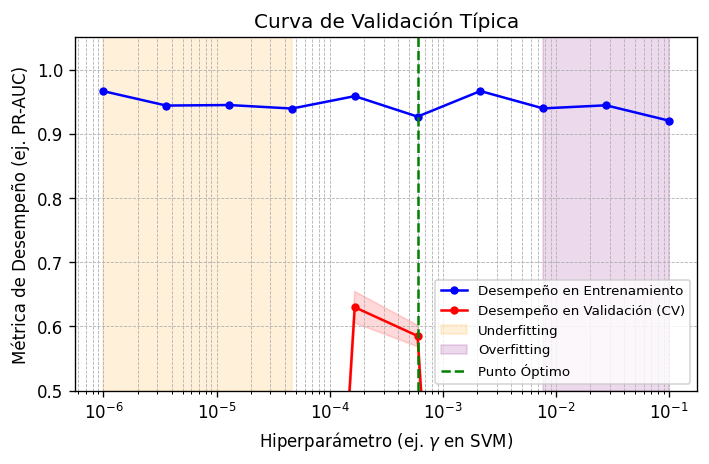

In [ ]:
# This cell builds an interactive HTML page for Google Colab/Jupyter on "Validation Curves".
# It includes:
# - Theme toggle (light/dark) & animated background
# - Collapsible sections with a sticky index
# - MathJax for LaTeX formulas
# - A new, detailed Matplotlib chart showing a typical validation curve with uncertainty.
# - A practical Python code example using scikit-learn's validation_curve function.

from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import io, base64, os

# -------------------- Utilities --------------------
def fig_to_base64(dpi=120):
    """Encode current Matplotlib figure to base64 PNG and close the figure."""
    buf = io.BytesIO()
    plt.savefig(buf, format="png", dpi=dpi, bbox_inches="tight")
    plt.close()
    buf.seek(0)
    return base64.b64encode(buf.read()).decode("ascii")

# -------------------- Figure: Validation Curve Example --------------------
# This figure visually explains the core concepts of the text.
np.random.seed(1)
param_range = np.logspace(-6, -1, 10)
train_scores_mean = 0.95 - 0.2 * np.exp(2 * np.log10(param_range))
train_scores_mean += 0.01 * np.random.randn(len(param_range))

# Create a "U-shaped" curve for validation error (inverted for score)
val_scores_mean = 0.8 - 2.5 * (np.log10(param_range) + 3.5)**2
val_scores_mean += 0.02 * np.random.randn(len(param_range))
val_scores_std = 0.02 + 0.005 * np.random.randn(len(param_range))

plt.figure(figsize=(6, 4))
plt.title("Curva de Validación Típica")
plt.xlabel("Hiperparámetro (ej. $\gamma$ en SVM)")
plt.ylabel("Métrica de Desempeño (ej. PR-AUC)")

plt.semilogx(param_range, train_scores_mean, label="Desempeño en Entrenamiento", color="blue", marker='o', markersize=4)
plt.semilogx(param_range, val_scores_mean, label="Desempeño en Validación (CV)", color="red", marker='o', markersize=4)

# Add uncertainty band
plt.fill_between(param_range, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.15, color="red")

# Annotate regions
plt.axvspan(param_range[0], param_range[3], color='orange', alpha=0.15, label='Underfitting')
plt.axvspan(param_range[7], param_range[-1], color='purple', alpha=0.15, label='Overfitting')
plt.axvline(param_range[5], color='green', linestyle='--', label='Punto Óptimo')

plt.legend(loc='lower right', fontsize=8)
plt.ylim(0.5, 1.05)
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
img_validation_curve = fig_to_base64()


# -------------------- Content Blocks (User-provided text, adapted) --------------------

intro_html = fr"""
<p>Una curva de validación es un gráfico que muestra cómo cambia el desempeño de un modelo al modificar un <strong>hiperparámetro</strong> (ej. la profundidad de un árbol, el coeficiente de regularización \(\lambda\), o el \(\gamma\) de un SVM-RBF). En el eje X se coloca el valor del hiperparámetro y en el eje Y una métrica de desempeño (ej. PR-AUC, RMSE).</p>
<p>Se dibujan dos líneas: la métrica en <strong>entrenamiento</strong> y la métrica en <strong>validación</strong> (promediada con validación cruzada). Este gráfico revela el valor óptimo del hiperparámetro y diagnostica problemas de <strong>overfitting</strong> (sobreajuste) y <strong>underfitting</strong> (subajuste).</p>
<ul>
    <li><strong>Underfitting:</strong> Ambas curvas muestran un mal desempeño. El modelo es demasiado simple.</li>
    <li><strong>Overfitting:</strong> La curva de entrenamiento es excelente, pero la de validación es pobre. El modelo está memorizando el ruido. El "gap de generalización" (diferencia entre curvas) es grande.</li>
    <li><strong>Punto Óptimo:</strong> El valor del hiperparámetro que maximiza la métrica de validación antes de que el overfitting comience a dominar.</li>
</ul>
<div class="img-wrap">
  <img src="data:image/png;base64,{img_validation_curve}" alt="Gráfico de una curva de validación" loading="lazy" decoding="async" width="560">
  <figcaption>El objetivo es encontrar el "punto dulce" donde el modelo generaliza mejor a datos no vistos.</figcaption>
</div>
"""

interpretation_html = r"""
<h4>Cómo Interpretar la Curva</h4>
<p>La curva de entrenamiento suele ser monótona (mejora al aumentar la complejidad). La curva de validación típicamente tiene forma de "U" invertida (si es un score) o "U" (si es un error). Primero mejora al salir del underfitting, alcanza un óptimo y luego empeora por overfitting.</p>
<h4>La Regla de Una Desviación Estándar (1-SE Rule)</h4>
<p>La decisión no es simplemente "elegir el máximo". Si varios valores del hiperparámetro están dentro de un margen de error estadístico del máximo, es preferible elegir el <strong>modelo más simple (más regularizado)</strong> de ese grupo. Esto reduce el riesgo de sobreajuste a la partición específica de CV.</p>
<p><strong>Caso numérico:</strong> Se prueba un SVM con \(\gamma\) y se mide PR-AUC. El mejor promedio es <strong>0.412</strong> para \(\gamma=0.05\), con un error estándar (SE) de <strong>0.008</strong>. El umbral de la regla 1-SE es \(0.412 - 0.008 = 0.404\). Si para un \(\gamma=0.02\) (un modelo más simple/suave) se obtiene una PR-AUC de 0.409, este valor es estadísticamente indistinguible del máximo. Por lo tanto, se podría preferir \(\gamma=0.02\) por ser una solución más robusta y parsimoniosa.</p>
"""

code_example_html = r"""
<p>Scikit-learn ofrece la función <code>validation_curve</code> para generar los datos necesarios de forma eficiente. Esta función realiza la validación cruzada para cada valor del hiperparámetro especificado.</p>
<h4>Ejemplo de Código con Scikit-Learn</h4>
<pre><code class="language-python">
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import make_classification
from sklearn.linear_model import Ridge

# 1. Crear datos de ejemplo para regresión
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# 2. Definir el modelo y el rango del hiperparámetro
model = Ridge()
# 'alpha' es el parámetro de regularización para Ridge
param_name = "alpha"
param_range = np.logspace(-3, 2, 10)

# 3. Calcular la curva de validación
# cv=5 indica 5-fold CV.
# scoring='neg_root_mean_squared_error' es la métrica.
train_scores, test_scores = validation_curve(
    model, X, y,
    param_name=param_name,
    param_range=param_range,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

# 4. Procesar y mostrar resultados
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

print("--- Resultados de la Curva de Validación ---")
for param, train_mean, test_mean in zip(param_range, train_scores_mean, test_scores_mean):
    print(f"Alpha: {param:7.3f} | Train AUC: {train_mean:.4f} | Val AUC: {test_mean:.4f}")

# (El siguiente paso sería graficar estos resultados como en la figura de arriba)
</code></pre>
"""

pitfalls_html = r"""
<div class="grid-2">
    <div>
        <h4>Curva de Validación vs. Curva de Aprendizaje</h4>
        <p>No deben confundirse:</p>
        <ul>
            <li><strong>Curva de Validación:</strong> Varía un <strong>hiperparámetro</strong> (eje X) con un tamaño de datos fijo para diagnosticar sesgo-varianza.</li>
            <li><strong>Curva de Aprendizaje:</strong> Varía el <strong>tamaño del set de entrenamiento</strong> (eje X) con hiperparámetros fijos para decidir si se necesitan más datos.</li>
        </ul>
        <h4>Manejo de Múltiples Hiperparámetros</h4>
        <p>Cuando hay varios hiperparámetros, una curva se convierte en una superficie. Una estrategia común es realizar una búsqueda aleatoria amplia (<code>RandomizedSearchCV</code>) para encontrar una región prometedora, y luego trazar curvas de validación univariadas para cada hiperparámetro dentro de esa región, manteniendo los otros fijos.</p>
    </div>
    <div>
        <h4>Errores a Evitar</h4>
        <ul>
            <li><strong>Usar el conjunto de Test:</strong> Nunca uses el test para generar estas curvas. El test es solo para la evaluación final.</li>
            <li><strong>Fuga de Información:</strong> El preprocesamiento (ej. escalado) debe recalcularse dentro de cada fold de la CV. Usa <code>Pipelines</code> para garantizar esto.</li>
            <li><strong>Ignorar la Estructura de Datos:</strong> Usa particiones de CV adecuadas (<code>StratifiedKFold</code>, <code>GroupKFold</code>, <code>TimeSeriesSplit</code>) o la curva será engañosa.</li>
        </ul>
    </div>
</div>
"""

summary_html = r"""
<h4>El caso de Redes Neuronales</h4>
<p>En redes neuronales, el número de <strong>épocas de entrenamiento</strong> actúa como un hiperparámetro de complejidad. Si graficas el error de validación contra las épocas, verás la típica curva en "U". La técnica de <strong>early stopping</strong> consiste en detener el entrenamiento en el punto óptimo de esta curva, actuando como una forma de regularización implícita.</p>
<h4>Resumen Operativo</h4>
<p>Para tomar decisiones robustas con curvas de validación: elige una métrica alineada al negocio, explora un rango adecuado del hiperparámetro, estima cada punto con una estrategia de CV correcta, grafica los resultados de entrenamiento y validación con su incertidumbre, y aplica la regla de 1-SE para elegir una solución estable y parsimoniosa. Siempre, mantén el conjunto de test completamente separado hasta el final del proceso.</p>
"""

# -------------------- HTML Template --------------------
html_page = f"""
<!DOCTYPE html>
<html lang="es" data-theme="dark">
<head>
  <meta charset="UTF-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0" />
  <title>Guía Interactiva: Curvas de Validación</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;700;900&display=swap" rel="stylesheet" />
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.5.0/css/all.min.css" rel="stylesheet" />
  <script>
    window.MathJax = {{ tex: {{ inlineMath: [['$','$'], ['\\\\(','\\\\)']] }} }};
  </script>
  <script async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-svg.js"></script>
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg,#5b21b6 0%,#1e293b 100%); --bg-secondary: rgba(30,41,59,.92);
      --bg-tertiary: rgba(15,23,42,.88); --text-primary: #e2e8f0; --text-secondary: #cbd5e1;
      --accent: #a78bfa; --border: rgba(167,139,250,.28); --radius: 22px; --shadow: 0 16px 36px rgba(0,0,0,.40);
      --trans: all .35s cubic-bezier(.25,.8,.25,1); --bubble-core: rgba(167,139,250,.65); --bubble-glow: rgba(167,139,250,.35);
      --code-bg: #1e1b4b; --code-text: #e2e8f0;
    }}
    html[data-theme="light"] {{
      --bg-primary: linear-gradient(135deg,#f5f3ff 0%,#ede9fe 100%); --bg-secondary: rgba(255,255,255,.94);
      --bg-tertiary: rgba(245,243,255,.98); --text-primary: #5b21b6; --text-secondary: #374151;
      --accent: #7c3aed; --border: rgba(124,58,237,.30); --shadow: 0 16px 36px rgba(91,33,182,.18);
      --bubble-core: rgba(255,255,255,.55); --bubble-glow: rgba(124,58,237,.25);
      --code-bg: #f5f3ff; --code-text: #1e1b4b;
    }}
    * {{ box-sizing: border-box; }}
    body {{ margin: 0; background: var(--bg-primary); color: var(--text-primary); font-family: Inter, system-ui, sans-serif; font-size: 18px; line-height: 1.8; padding-bottom: 28px; }}
    #app {{ position: relative; min-height: 100vh; }}
    .particles {{ position:absolute; inset:0; z-index:0; pointer-events:none; overflow:hidden; }}
    .particle {{ position:absolute; border-radius:50%; background: radial-gradient(circle at 30% 30%, var(--bubble-core), transparent 60%); box-shadow: 0 0 12px 2px var(--bubble-glow), 0 0 24px 6px rgba(255,255,255,.08); filter: blur(0.2px); animation: floaty 26s infinite linear; opacity: 0; }}
    @keyframes floaty {{ 0% {{ transform: translateY(110%) rotate(0deg); opacity: 0; }} 10% {{ opacity: .75; }} 90% {{ opacity: .75; }} 100% {{ transform: translateY(-15%) rotate(360deg); opacity: 0; }} }}
    .topbar {{ position: sticky; top: 10px; z-index: 2; display:flex; align-items:center; justify-content:space-between; margin: 14px auto 0; padding: 12px 14px; max-width: 1120px; background: var(--bg-secondary); border: 1.6px solid var(--border); border-radius: var(--radius); box-shadow: var(--shadow); backdrop-filter: blur(12px); gap: 10px; flex-wrap: wrap; }}
    .brand {{ font-weight: 900; letter-spacing: .35px; font-size: 20px; display:flex; gap:8px; align-items:center; }}
    .actions {{ display:flex; align-items:center; gap: 10px; position:relative; flex-wrap:wrap; }}
    .menu-btn {{ display:inline-flex; align-items:center; gap:.55rem; padding:.68rem 1.05rem; border-radius:999px; cursor:pointer; border:1px solid var(--border); background: var(--bg-tertiary); transition: var(--trans); font-weight:800; text-decoration:none; color: var(--text-primary); }}
    .menu-btn:hover {{ transform: translateY(-1px); }}
    .menu-list {{ position:absolute; top:110%; left:0; min-width:300px; background: var(--bg-secondary); border:1.5px solid var(--border); border-radius:14px; box-shadow: var(--shadow); padding:.6rem; display:none; max-height:60vh; overflow:auto; z-index:10; }}
    .menu-link {{ display:block; padding:.65rem .8rem; border-radius:10px; text-decoration:none; color: var(--text-primary); font-size: 16px; }}
    .menu-link:hover {{ background: var(--bg-tertiary); }}
    .theme-toggle {{ display:inline-flex; align-items:center; gap:.6rem; padding:.72rem 1.1rem; border-radius:999px; cursor:pointer; user-select:none; border:1.5px solid var(--border); background: var(--bg-tertiary); transition: var(--trans); font-weight: 900; color: var(--text-primary); box-shadow: inset 0 0 0 2px rgba(255,255,255,.04), 0 8px 20px rgba(0,0,0,.1); }}
    .theme-toggle:hover {{ transform: translateY(-1px); }}
    .container {{ position:relative; z-index:1; max-width:1120px; margin: 14px auto 20px; padding: 0 14px; }}
    .page-title {{ text-align:center; margin: 16px 0 20px; font-weight: 900; font-size: clamp(28px, 4vw, 42px); background: linear-gradient(135deg, var(--accent), #c4b5fd); -webkit-background-clip: text; -webkit-text-fill-color: transparent; letter-spacing: .4px; padding: 0 20px; }}
    .topic-card {{ background: var(--bg-secondary); border: 1.6px solid var(--border); border-radius: var(--radius); box-shadow: var(--shadow); overflow:hidden; margin: 16px 0; }}
    .topic-header {{ display:flex; justify-content:space-between; align-items:center; padding: 18px 22px; cursor:pointer; }}
    .topic-title {{ font-weight: 900; font-size: 20px; }}
    .expand-icon {{ transition: var(--trans); color: var(--text-secondary); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); color: var(--accent); }}
    .topic-content {{ max-height:0; overflow:hidden; transition: max-height: 1.8s ease, padding .4s ease; background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 8000px; padding: 16px 22px; }}
    .topic-content p, .topic-content ul {{ color: var(--text-secondary); margin: .65rem 0; }}
    .topic-content ul {{ padding-left: 25px; }}
    .grid-2 {{ display:grid; grid-template-columns: repeat(auto-fit, minmax(320px, 1fr)); gap: 18px; }}
    .img-wrap {{ text-align:center; margin: 12px auto; }}
    figcaption {{ font-size: 14px; opacity:.85; }}
    pre {{ background: var(--code-bg); border: 1px solid var(--border); padding: 1em; border-radius: 12px; overflow-x: auto; font-family: 'SF Mono', 'Consolas', 'Menlo', monospace; font-size: 15px; line-height: 1.6; color: var(--code-text); }}
    code {{ background: rgba(148,163,184,.18); padding: .12rem .4rem; border-radius: 6px; font-family: 'SF Mono', 'Consolas', monospace; }}
    pre code {{ background: none; padding: 0; }}
    footer {{ text-align:center; color: var(--text-secondary); opacity:.92; margin: 22px 0 8px; font-weight:800; font-size: 14px; }}
  </style>
</head>
<body>
  <div id="app">
    <div class="particles" id="particles"></div>
    <div class="topbar">
      <div class="brand"><i class="fa-solid fa-chart-line"></i> Curvas de Validación</div>
      <div class="actions">
        <div class="dropdown" style="position:relative;">
          <button id="menuBtn" class="menu-btn" aria-haspopup="true" aria-expanded="false"><i class="fa-solid fa-list"></i> Índice <i class="fa-solid fa-chevron-down"></i></button>
          <div id="menuList" class="menu-list" role="menu">
            <a class="menu-link" href="#intro">1) ¿Qué es una Curva de Validación?</a>
            <a class="menu-link" href="#interpretation">2) Interpretación y Toma de Decisiones</a>
            <a class="menu-link" href="#code_example">3) Ejemplo de Código con Scikit-Learn</a>
            <a class="menu-link" href="#pitfalls">4) Conceptos Relacionados y Errores</a>
            <a class="menu-link" href="#summary">5) Resumen y Casos Adicionales</a>
          </div>
        </div>
      </div>
      <button id="themeBtn" class="theme-toggle" title="Cambiar tema" aria-pressed="true"><i id="themeIcon" class="fa-solid fa-sun" aria-hidden="true"></i></button>
    </div>

    <main class="container">
      <h1 class="page-title">Diagnóstico de Modelos con Curvas de Validación</h1>

      <section id="intro" class="topic-card open"><div class="topic-header" role="button"><span class="topic-title">1) ¿Qué es una Curva de Validación?</span><i class="fa-solid fa-chevron-down expand-icon"></i></div><div class="topic-content">{intro_html}</div></section>
      <section id="interpretation" class="topic-card open"><div class="topic-header" role="button"><span class="topic-title">2) Interpretación y Toma de Decisiones</span><i class="fa-solid fa-chevron-down expand-icon"></i></div><div class="topic-content">{interpretation_html}</div></section>
      <section id="code_example" class="topic-card"><div class="topic-header" role="button"><span class="topic-title">3) Ejemplo de Código con Scikit-Learn</span><i class="fa-solid fa-chevron-down expand-icon"></i></div><div class="topic-content">{code_example_html}</div></section>
      <section id="pitfalls" class="topic-card"><div class="topic-header" role="button"><span class="topic-title">4) Conceptos Relacionados y Errores Comunes</span><i class="fa-solid fa-chevron-down expand-icon"></i></div><div class="topic-content">{pitfalls_html}</div></section>
      <section id="summary" class="topic-card"><div class="topic-header" role="button"><span class="topic-title">5) Resumen y Casos Adicionales</span><i class="fa-solid fa-chevron-down expand-icon"></i></div><div class="topic-content">{summary_html}</div></section>

      <footer>Material elaborado por el profesor Sergio Gevatschnaider</footer>
    </main>

    <script>
      (function() {{
        const root = document.getElementById('app'); const doc = document.documentElement;
        const themeBtn = root.querySelector('#themeBtn'), themeIcon = root.querySelector('#themeIcon');
        function setTheme(t) {{ doc.setAttribute('data-theme', t); try {{ localStorage.setItem('mlval.theme', t); }} catch(e) {{}} themeIcon.className = (t === 'dark') ? 'fa-solid fa-sun' : 'fa-solid fa-moon'; themeBtn.setAttribute('aria-pressed', (t === 'dark').toString()); }}
        const saved = (typeof localStorage !== 'undefined') ? localStorage.getItem('mlval.theme') : 'dark';
        setTheme(saved || 'dark');
        themeBtn.addEventListener('click', () => setTheme((doc.getAttribute('data-theme') === 'dark') ? 'light' : 'dark'));
        const container = root.querySelector('#particles');
        for (let i = 0; i < 46; i++) {{
          const p = document.createElement('div'); p.className = 'particle'; const size = (Math.random() * 14 + 6);
          p.style.width = size + 'px'; p.style.height = size + 'px'; p.style.left = (Math.random() * 100) + '%';
          p.style.bottom = (-12 + Math.random() * 12) + '%'; p.style.animationDelay = (Math.random() * -24) + 's';
          p.style.animationDuration = (20 + Math.random() * 16) + 's'; container.appendChild(p);
        }}
        const menuBtn  = root.querySelector('#menuBtn'), menuList = root.querySelector('#menuList');
        menuBtn.addEventListener('click', (e) => {{ e.stopPropagation(); const open = menuList.style.display === 'block'; menuList.style.display = open ? 'none' : 'block'; menuBtn.setAttribute('aria-expanded', (!open).toString()); }});
        document.addEventListener('click', () => {{ menuList.style.display = 'none'; menuBtn.setAttribute('aria-expanded', 'false'); }});
        menuList.querySelectorAll('a.menu-link').forEach(a => {{
          a.addEventListener('click', (e) => {{
            e.preventDefault(); e.stopPropagation(); const target = document.querySelector(a.getAttribute('href'));
            if (target) window.scrollTo({{ top: target.getBoundingClientRect().top + window.scrollY - 80, behavior: 'smooth' }});
            menuList.style.display = 'none'; menuBtn.setAttribute('aria-expanded', 'false');
          }});
        }});
        root.querySelectorAll('.topic-header').forEach(h => h.addEventListener('click', () => h.parentElement.classList.toggle('open')));
      }})();
    </script>
  </div>
</body>
</html>
"""

# Display the final interactive HTML page in the output cell
display(HTML(html_page))

Scores por fold: [1.         0.96666667 0.86666667 1.         0.93333333]
Accuracy promedio: 0.9533333333333334
Desv. estándar: 0.04988876515698587


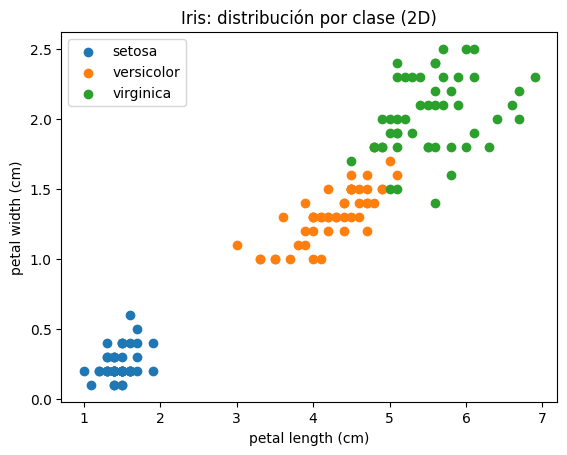

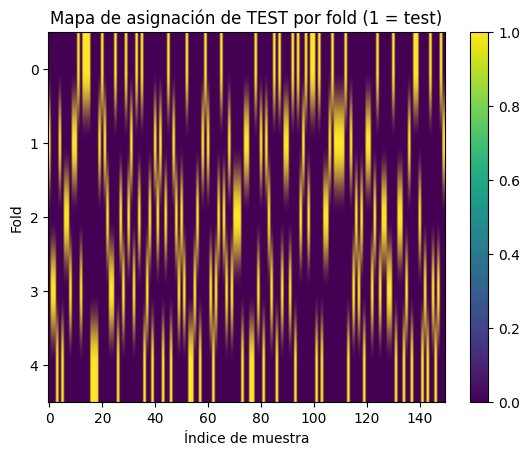

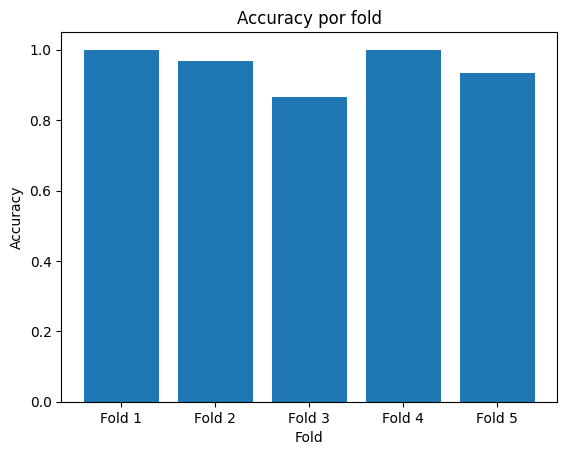

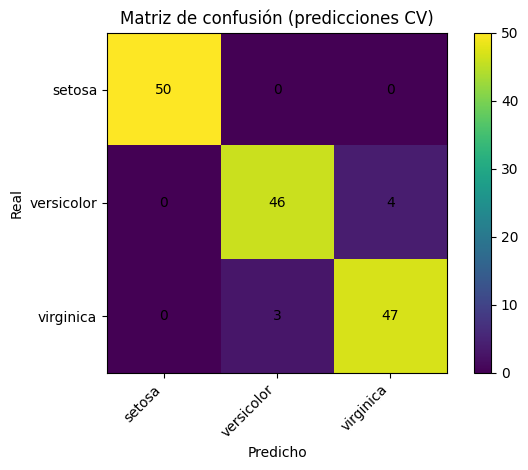

In [ ]:
# --- Visual k-NN + 5-fold CV sobre IRIS ---
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# 1) Datos
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names  = iris.target_names

# 2) Modelo
knn = KNeighborsClassifier(n_neighbors=3)

# 3) CV estratificada (mantiene proporción de clases en cada fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4) Accuracy por fold
scores = cross_val_score(knn, X, y, cv=cv)
print("Scores por fold:", scores)
print("Accuracy promedio:", scores.mean())
print("Desv. estándar:", scores.std())

# ====== V I S U A L I Z A C I O N E S ======

# A) Distribución de los datos (2 features para poder ver en 2D)
f1, f2 = 2, 3  # petal length y petal width (las más separables)
plt.figure()
for c in np.unique(y):
    plt.scatter(X[y==c, f1], X[y==c, f2], label=target_names[c])
plt.xlabel(feature_names[f1]); plt.ylabel(feature_names[f2])
plt.title("Iris: distribución por clase (2D)")
plt.legend(loc="best")
plt.show()

# B) Mapa de folds: 1 si esa muestra es TEST en ese fold (0 si es TRAIN)
assign_matrix = np.zeros((cv.get_n_splits(), X.shape[0]))
for r, (_, test_idx) in enumerate(cv.split(X, y)):
    assign_matrix[r, test_idx] = 1

plt.figure()
plt.imshow(assign_matrix, aspect='auto')
plt.xlabel("Índice de muestra"); plt.ylabel("Fold")
plt.title("Mapa de asignación de TEST por fold (1 = test)")
plt.colorbar()
plt.show()

# C) Barras: accuracy por fold
plt.figure()
x = np.arange(1, len(scores)+1)
plt.bar(x, scores)
plt.xticks(x, [f"Fold {i}" for i in x])
plt.ylim(0, 1.05)
plt.title("Accuracy por fold")
plt.ylabel("Accuracy"); plt.xlabel("Fold")
plt.show()

# D) Matriz de confusión (usando predicciones hechas por CV)
y_pred = cross_val_predict(knn, X, y, cv=cv)
cm = confusion_matrix(y, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Matriz de confusión (predicciones CV)")
plt.xlabel("Predicho"); plt.ylabel("Real")
plt.xticks(np.arange(len(target_names)), target_names, rotation=45, ha="right")
plt.yticks(np.arange(len(target_names)), target_names)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.colorbar(); plt.tight_layout()
plt.show()



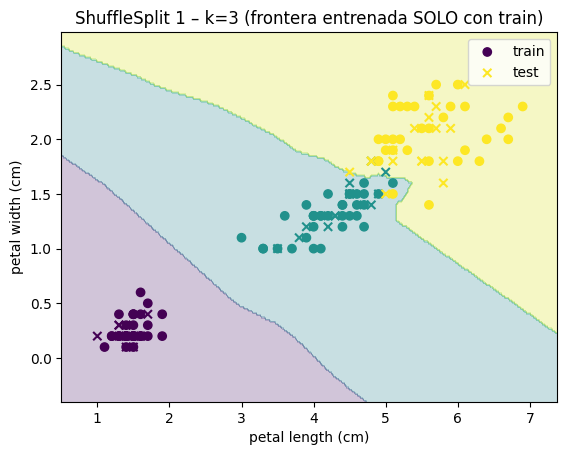

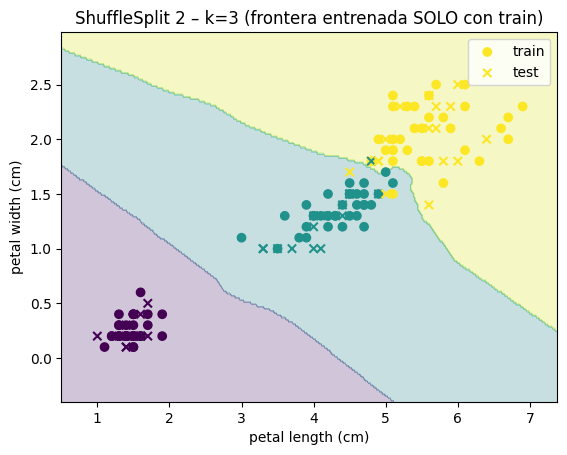

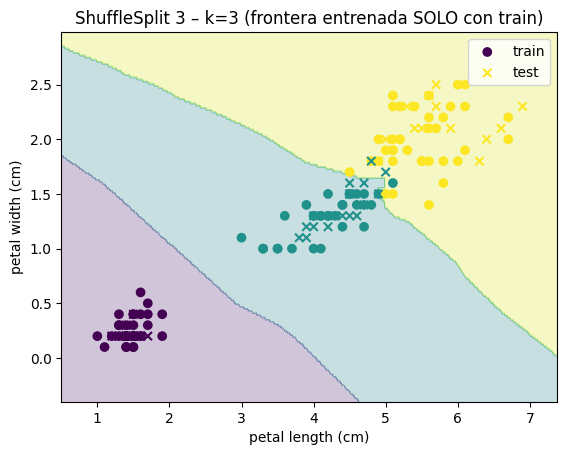

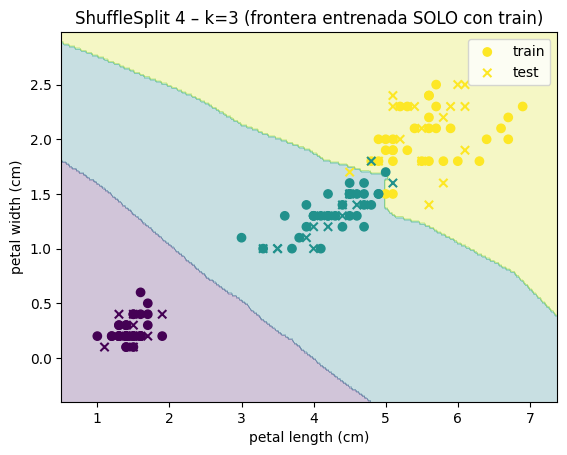

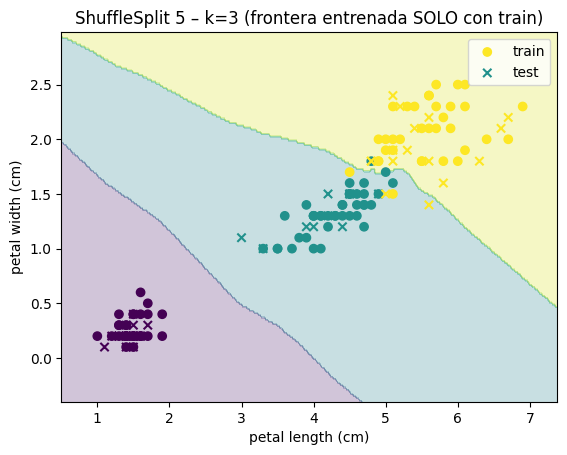

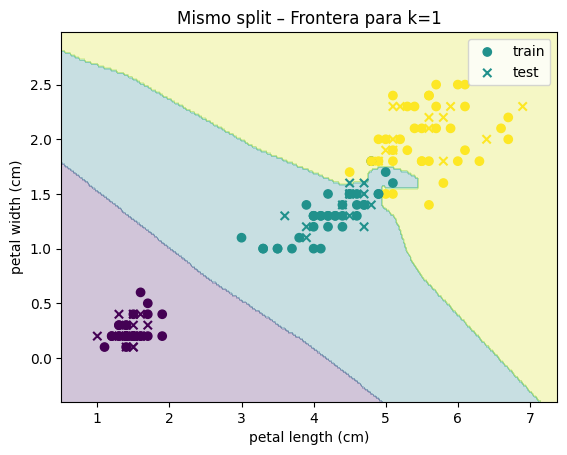

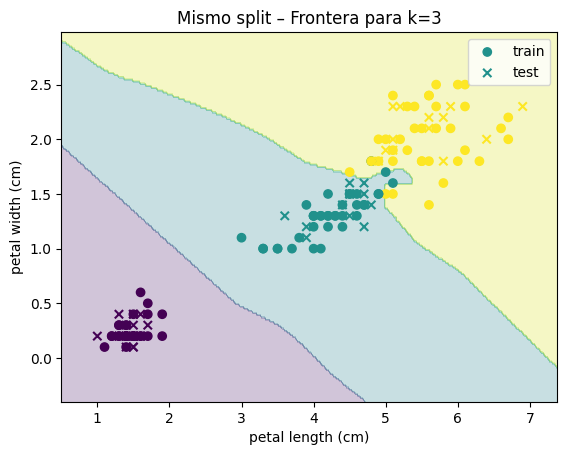

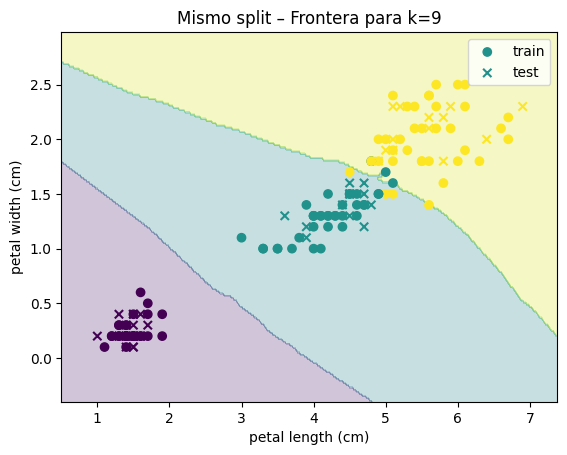

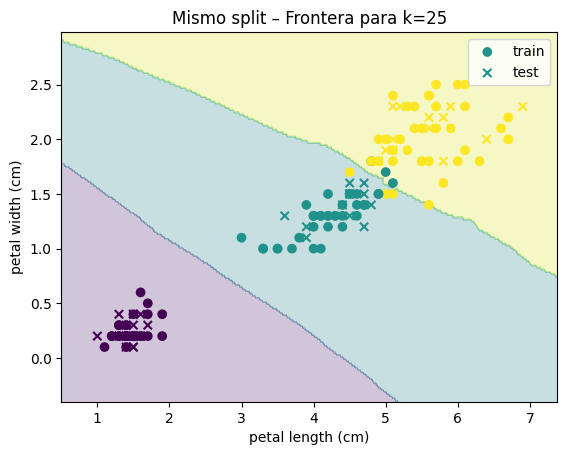

In [ ]:
# === Fronteras de decisión con ShuffleSplit (k-NN) ===
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# ---------- 1) Datos (2 features para 2D)
iris = load_iris()
X_full, y = iris.data, iris.target
feat_names = iris.feature_names
target_names = iris.target_names

# Tomamos 2 features más separables visualmente (petalo)
f1, f2 = 2, 3
X = X_full[:, [f1, f2]]

# ---------- 2) Modelo (pipeline con estandarización para que distancias sean comparables)
def make_model(k=3):
    return Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])

# ---------- 3) Función para pintar la frontera de decisión de un modelo 2D
def plot_decision_boundary(model, X, y, title, train_idx=None, test_idx=None, padding=0.5, step=0.02):
    # malla 2D
    x_min, x_max = X[:, 0].min() - padding, X[:, 0].max() + padding
    y_min, y_max = X[:, 1].min() - padding, X[:, 1].max() + padding
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # predicción en la malla
    Z = model.predict(grid).reshape(xx.shape)

    # --- figura individual (sin subplots)
    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.25)  # mapa de regiones (colormap por defecto)

    # puntos de train/test
    if train_idx is None or test_idx is None:
        plt.scatter(X[:, 0], X[:, 1], c=y)
    else:
        # train como círculos
        plt.scatter(X[train_idx, 0], X[train_idx, 1], c=y[train_idx], label="train")
        # test como cruces
        plt.scatter(X[test_idx, 0], X[test_idx, 1], c=y[test_idx], marker='x', label="test")

    plt.xlabel(feat_names[f1]); plt.ylabel(feat_names[f2])
    plt.title(title)
    plt.legend(loc="best")
    plt.show()

# ---------- 4) Varias particiones aleatorias: entrenar, pintar frontera y puntos
ss = ShuffleSplit(n_splits=5, test_size=0.3, random_state=7)
for i, (train_idx, test_idx) in enumerate(ss.split(X, y), start=1):
    model = make_model(k=3)
    model.fit(X[train_idx], y[train_idx])
    title = f"ShuffleSplit {i} – k=3 (frontera entrenada SOLO con train)"
    plot_decision_boundary(model, X, y, title, train_idx=train_idx, test_idx=test_idx)

# ---------- 5) Cómo cambia la geometría al variar k (mismo split)
train_idx, test_idx = next(ShuffleSplit(n_splits=1, test_size=0.3, random_state=42).split(X, y))
for k in [1, 3, 9, 25]:
    model = make_model(k=k)
    model.fit(X[train_idx], y[train_idx])
    title = f"Mismo split – Frontera para k={k}"
    plot_decision_boundary(model, X, y, title, train_idx=train_idx, test_idx=test_idx)


Scores (5 splits): [1.     1.     0.9111 0.9778 0.9556]
Accuracy promedio: 0.9688888888888888
Desv. estándar: 0.03325917677132392


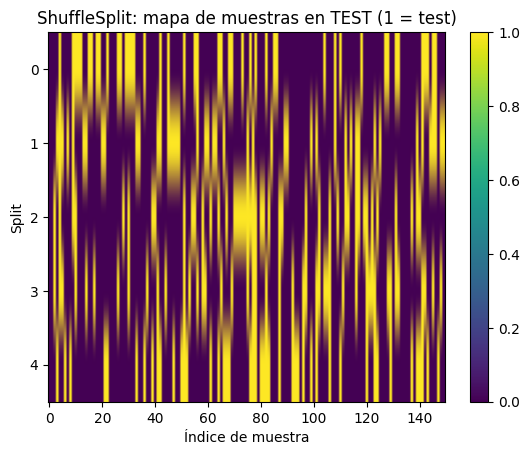

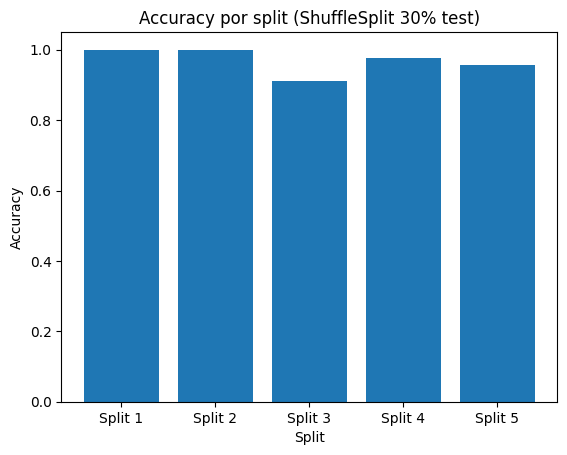

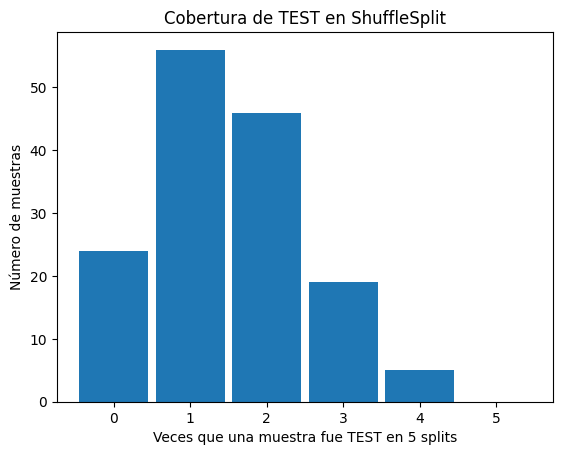

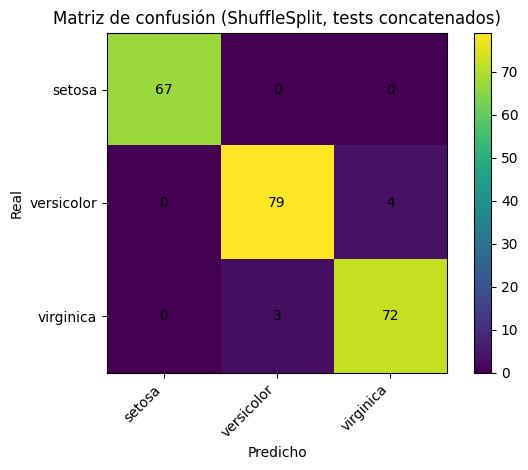

Promedio 100 splits: 0.964 Desv: 0.02149475962549998


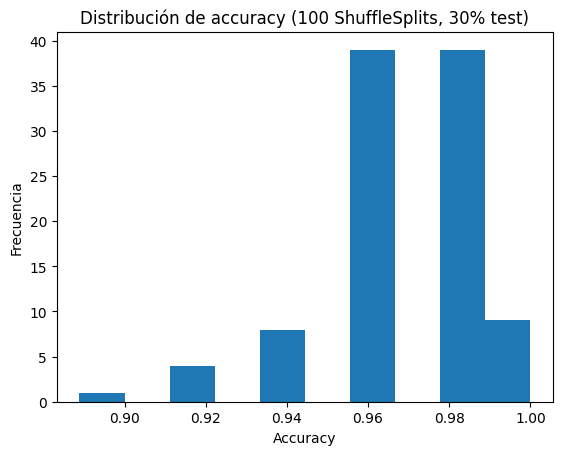

In [ ]:
# Visual ShuffleSplit (validación cruzada aleatoria) con k-NN en IRIS
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# 1) Datos y modelo
iris = load_iris()
X, y = iris.data, iris.target
target_names = iris.target_names
model = KNeighborsClassifier(n_neighbors=3)

# 2) Definimos ShuffleSplit: 5 iteraciones, 30% test
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

# 3) Accuracy por split
scores = cross_val_score(model, X, y, cv=cv)
print("Scores (5 splits):", np.round(scores, 4))
print("Accuracy promedio:", scores.mean())
print("Desv. estándar:", scores.std())

# ====== V I S U A L E S ======

# A) Mapa de asignación a TEST (1 si la muestra fue test en ese split)
assign_matrix = np.zeros((cv.get_n_splits(), X.shape[0]), dtype=int)
for r, (_, test_idx) in enumerate(cv.split(X, y)):
    assign_matrix[r, test_idx] = 1

plt.figure()
plt.imshow(assign_matrix, aspect='auto')
plt.xlabel("Índice de muestra"); plt.ylabel("Split")
plt.title("ShuffleSplit: mapa de muestras en TEST (1 = test)")
plt.colorbar()
plt.show()

# B) Barras: accuracy por split
plt.figure()
x = np.arange(1, len(scores)+1)
plt.bar(x, scores)
plt.xticks(x, [f"Split {i}" for i in x])
plt.ylim(0, 1.05)
plt.title("Accuracy por split (ShuffleSplit 30% test)")
plt.ylabel("Accuracy"); plt.xlabel("Split")
plt.show()

# C) ¿Cuántas veces fue TEST cada muestra? (0..5)
test_counts = assign_matrix.sum(axis=0)
bins = np.arange(-0.5, cv.get_n_splits()+1.5, 1)
plt.figure()
plt.hist(test_counts, bins=bins, rwidth=0.9)
plt.xticks(np.arange(0, cv.get_n_splits()+1, 1))
plt.xlabel("Veces que una muestra fue TEST en 5 splits")
plt.ylabel("Número de muestras")
plt.title("Cobertura de TEST en ShuffleSplit")
plt.show()

# D) Matriz de confusión con todas las predicciones de TEST concatenadas
y_true_all, y_pred_all = [], []
for train_idx, test_idx in ShuffleSplit(n_splits=5, test_size=0.3, random_state=42).split(X, y):
    model.fit(X[train_idx], y[train_idx])
    y_pred_all.append(model.predict(X[test_idx]))
    y_true_all.append(y[test_idx])

y_true_all = np.concatenate(y_true_all)
y_pred_all = np.concatenate(y_pred_all)
cm = confusion_matrix(y_true_all, y_pred_all)

plt.figure()
plt.imshow(cm)
plt.title("Matriz de confusión (ShuffleSplit, tests concatenados)")
plt.xlabel("Predicho"); plt.ylabel("Real")
plt.xticks(np.arange(len(target_names)), target_names, rotation=45, ha="right")
plt.yticks(np.arange(len(target_names)), target_names)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.colorbar(); plt.tight_layout()
plt.show()

# E) Variabilidad por aleatoriedad: 100 splits
cv_many = ShuffleSplit(n_splits=100, test_size=0.3, random_state=123)
scores_many = cross_val_score(model, X, y, cv=cv_many)
print("Promedio 100 splits:", scores_many.mean(), "Desv:", scores_many.std())

plt.figure()
plt.hist(scores_many, bins=10)
plt.xlabel("Accuracy"); plt.ylabel("Frecuencia")
plt.title("Distribución de accuracy (100 ShuffleSplits, 30% test)")
plt.show()

